In [1]:
# Kutuphanelerin eklenmesi
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.utils.multiclass import unique_labels
import time
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

In [2]:
data = pd.read_csv(r"C:\Users\ABY\Desktop\Kodlar\Jupyter-Notebook\dataset.csv")
trData = data.copy()

In [3]:
trData.rename({"fixed acidity": "sabit asit", "volatile acidity": "uçucu asit","citric acid":"sitrik asit",
            "residual sugar":"artık şeker","chlorides":"klorürler",
            "free sulfur dioxide":"serbest sülfür dioksit",
            "total sulfur dioxide":"toplam sülfür dioksit",
            "density":"yoğunluk","pH":"pH","sulphates":"sülfatlar","alcohol":"alkol oranı",
            "quality":"kalite"}, axis="columns", inplace=True)

trData.head()

,sabit asit,uçucu asit,sitrik asit,artık şeker,klorürler,serbest sülfür dioksit,toplam sülfür dioksit,yoğunluk,pH,sülfatlar,alkol oranı,kalite
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

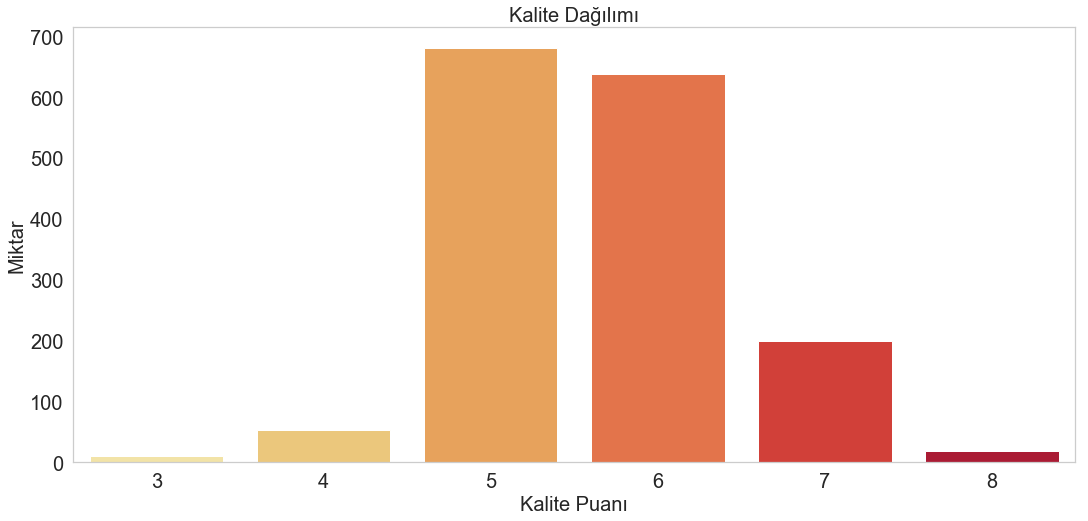

In [8]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(16,8)
sns.countplot(x = "quality"  ,data=data , palette = sns.color_palette("YlOrRd", 6))
ax.set_title("Kalite Dağılımı",fontsize=20)
ax.set_xlabel('Kalite Puanı',fontsize=20)
ax.set_ylabel('Miktar',fontsize=20)
ax.tick_params(labelsize=20)
ax.grid(False)
plt.show()

In [9]:
def plotGraphics(dataset, rows, cols, plotMethod, fontSize = 40,
                 titles = ["Yoğunluk","Klorürler","Uçucu Asitliği","Sülfatlar","Sitrik Asit","Alkol"],x="quality"):
    columnName=dataset.columns.values
    columnLen=len(columnName)
    fig, ax=plt.subplots(rows,cols)
    fig.set_size_inches(30,20)

    counter=0
    for i in range(rows):
        for j in range(cols):
            if 'box'in plotMethod :
                sns.boxplot(x=x, y=columnName[counter],data=dataset, ax=ax[i][j])
                ax[i][j].set_xlabel("Kalite",fontsize=0)
                ax[i][j].tick_params(labelsize=20)
                ax[i][j].set_ylabel("Kalite",fontsize=0)
                ax[i][j].axes.set_title(titles[counter],fontsize=fontSize)
            elif 'point' in plotMethod:
                sns.pointplot(x=x,y=columnName[counter],data=dataset, ax=ax[i][j])
                ax[i][j].set_xlabel("Kalite",fontsize=0)
                ax[i][j].set_ylabel("Kalite",fontsize=0)
                ax[i][j].tick_params(labelsize=20)
                ax[i][j].axes.set_title(titles[counter],fontsize=fontSize)
            counter+=1
            if counter==(columnLen-1,):
                break

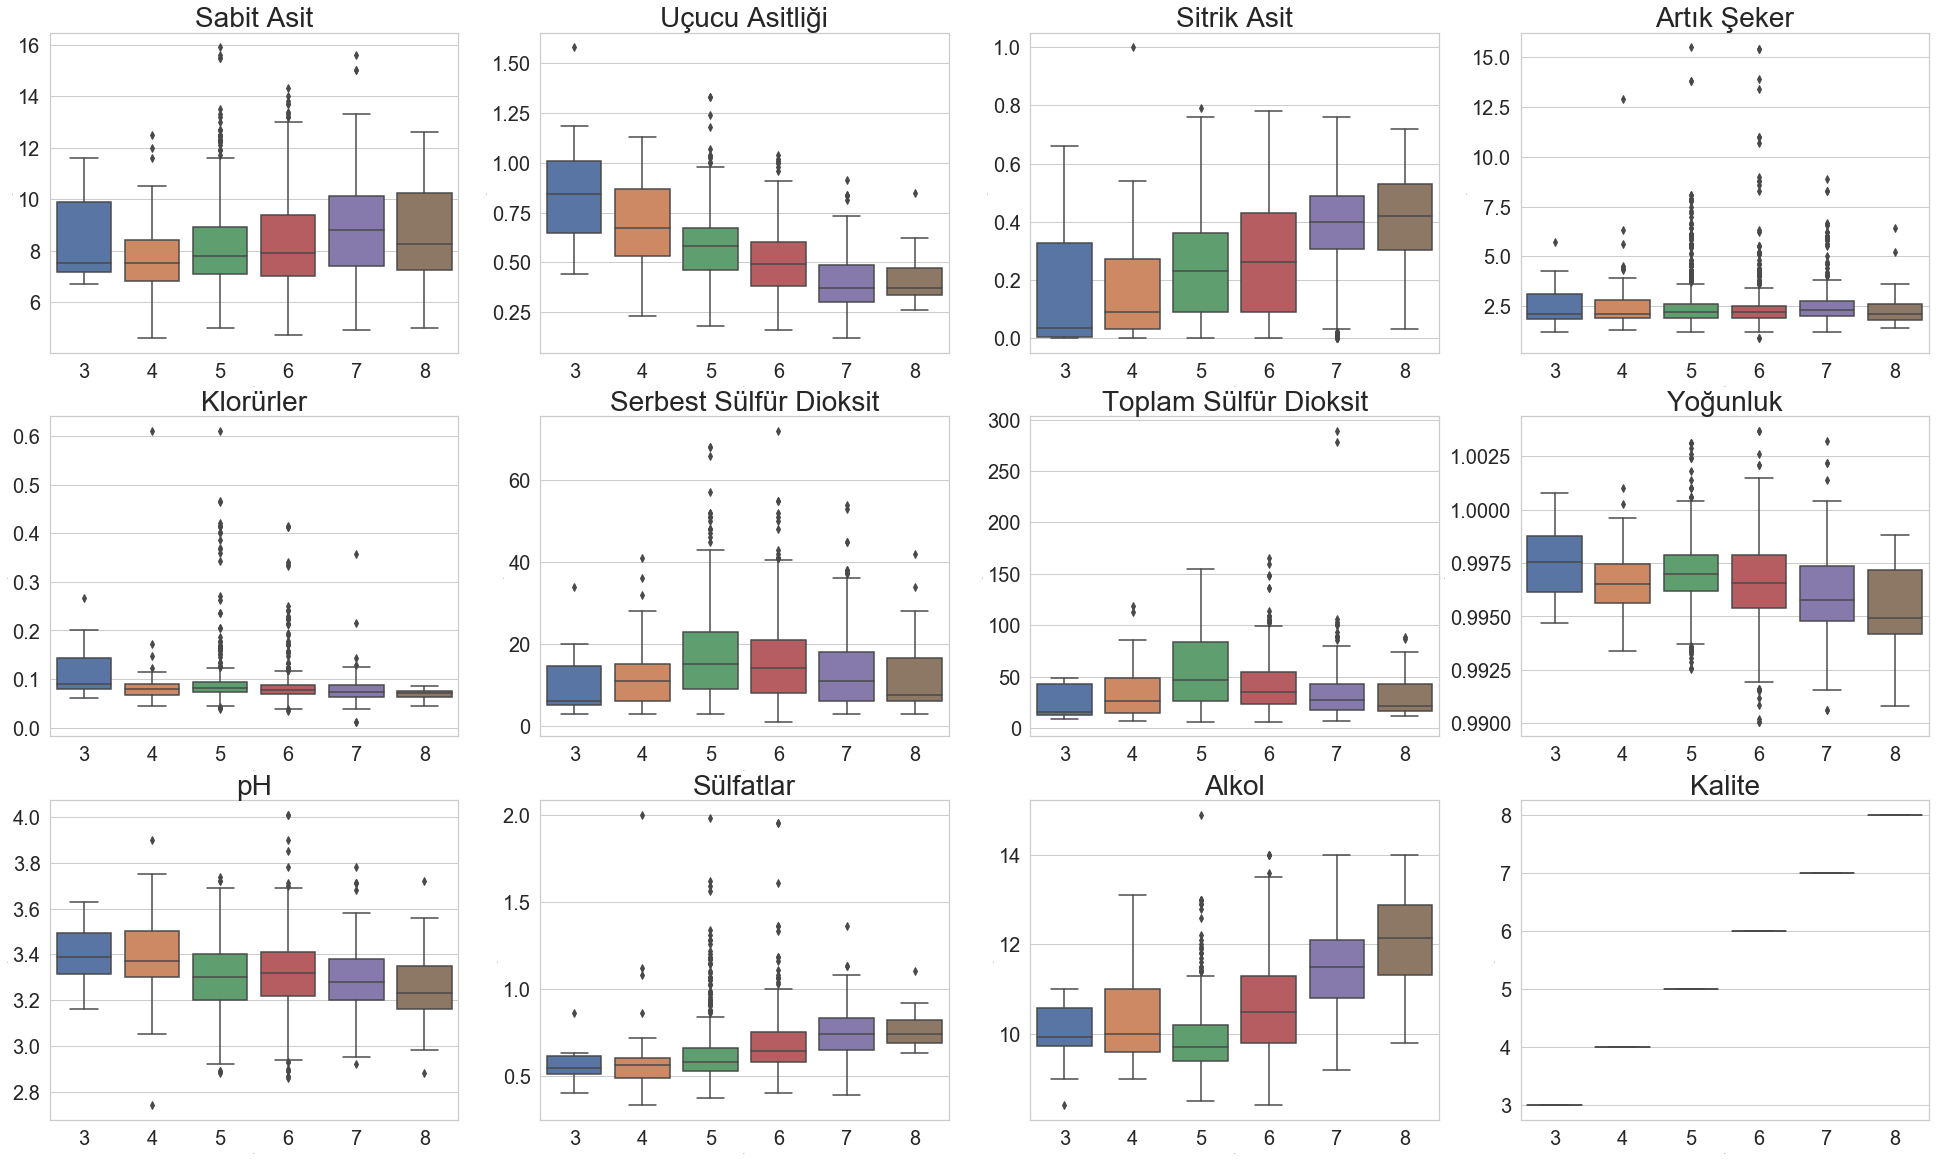

In [10]:
titles = ["Sabit Asit", "Uçucu Asitliği", "Sitrik Asit", "Artık Şeker", "Klorürler", "Serbest Sülfür Dioksit", 
         "Toplam Sülfür Dioksit", "Yoğunluk", "pH", "Sülfatlar", "Alkol", "Kalite"]
plotGraphics(data,3,4,"box",28,titles)

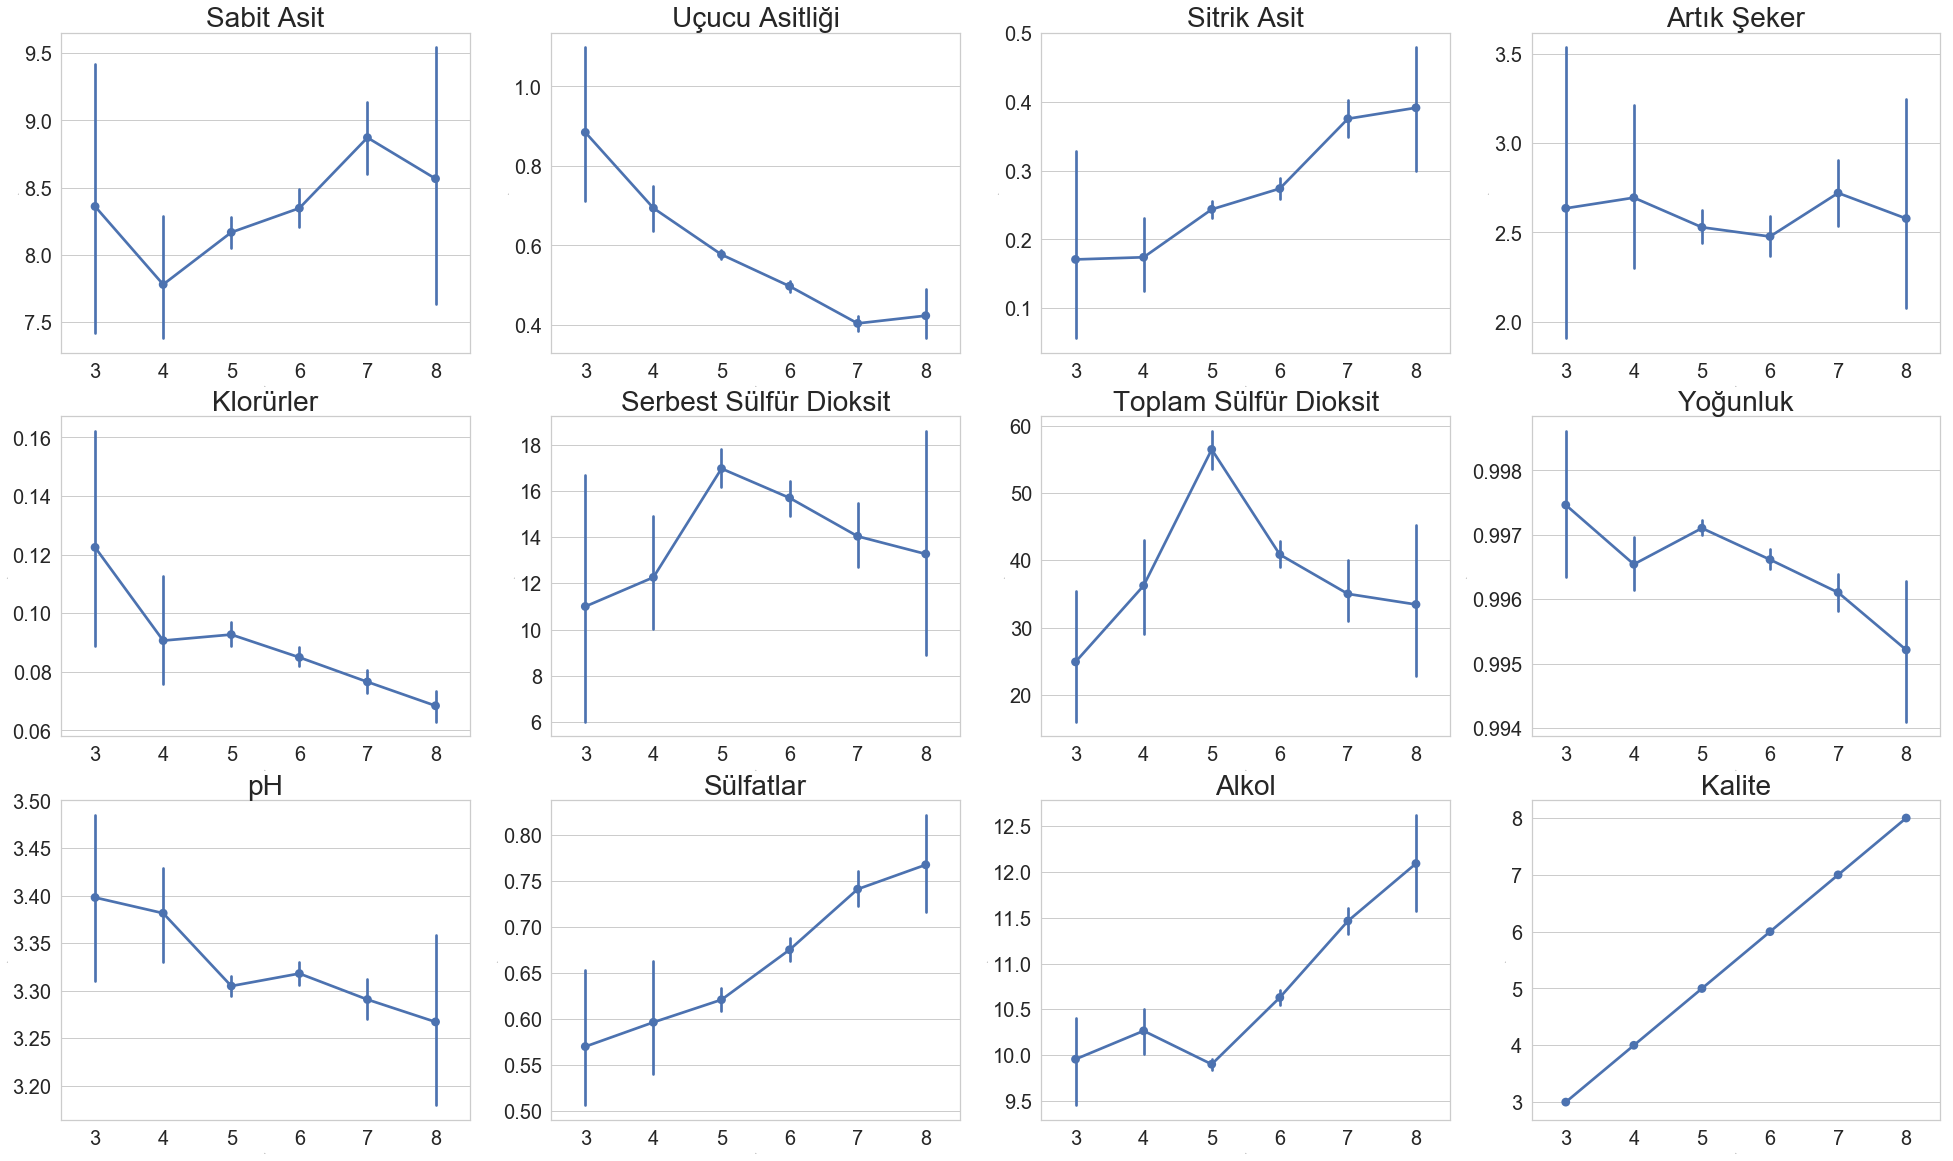

In [11]:
plotGraphics(data,3,4,"point",28,titles)

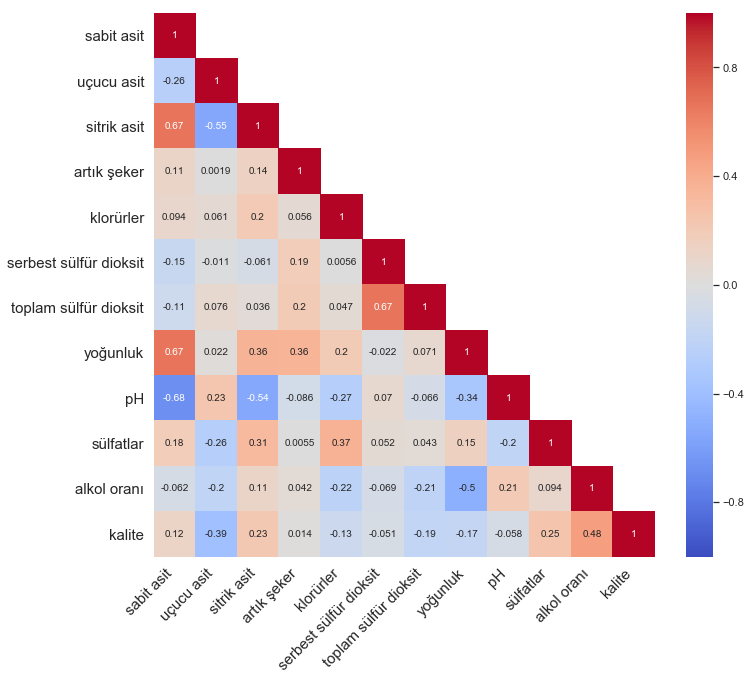

In [12]:
cor_mat= trData.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(nrows = 1, ncols = 1 , figsize = (10,10))

heatmap = sns.heatmap(trData.corr(),
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            mask = mask,
            annot=True)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=20)
ax.tick_params(labelsize=15)
plt.savefig("heatmap.png")

In [13]:
features=['density', 'chlorides', 'volatile acidity', 'sulphates', 'citric acid', 'alcohol', 'quality']
featuresDF=data[features]

In [14]:
trFeaturesData = data[['density', 'chlorides', 'volatile acidity', 'sulphates', 'citric acid', "total sulfur dioxide", 'alcohol','quality']]
trFeaturesData.rename({"volatile acidity": "uçucu asit","citric acid":"sitrik asit",
            "chlorides":"klorürler",
            "total sulfur dioxide":"toplam sülfür dioksit",
            "density":"yoğunluk","sulphates":"sülfatlar","alcohol":"alkol oranı",
            "quality":"kalite"}, 
            axis="columns", inplace=True)

In [15]:
condition1=(trFeaturesData['kalite']==3)|(trFeaturesData['kalite']==4)
condition2=(trFeaturesData['kalite']==5)|(trFeaturesData['kalite']==6)
condition3=(trFeaturesData['kalite']==7)|(trFeaturesData['kalite']==8)

In [16]:
kötü=round(trFeaturesData[condition1].describe(),2)
orta=round(trFeaturesData[condition2].describe(),2)
iyi=round(trFeaturesData[condition3].describe(),2)

In [17]:
level_all=pd.concat([kötü,orta,iyi],
                    axis=1, 
                    keys=['Kalite:3,4','Kalite:5,6','Kalite:7,8',])
level_all.T

count   mean    std   min    25%    50%  \
Kalite:3,4 yoğunluk                 63.0   1.00   0.00  0.99   1.00   1.00   
           klorürler                63.0   0.10   0.08  0.04   0.07   0.08   
           uçucu asit               63.0   0.72   0.25  0.23   0.56   0.68   
           sülfatlar                63.0   0.59   0.22  0.33   0.50   0.56   
           sitrik asit              63.0   0.17   0.21  0.00   0.02   0.08   
           toplam sülfür dioksit    63.0  34.44  26.40  7.00  13.50  26.00   
           alkol oranı              63.0  10.22   0.92  8.40   9.60  10.00   
           kalite                   63.0   3.84   0.37  3.00   4.00   4.00   
Kalite:5,6 yoğunluk               1319.0   1.00   0.00  0.99   1.00   1.00   
           klorürler              1319.0   0.09   0.05  0.03   0.07   0.08   
           uçucu asit             1319.0   0.54   0.17  0.16   0.41   0.54   
           sülfatlar              1319.0   0.65   0.17  0.37   0.54   0.61   
           sitrik asit            1319.0   0.26   0.19  0.00   0.09   0.24   
           toplam sülfür dioksit  1319.0  48.95  32.71  6.00  24.00  40.00   
           alkol oranı            1319.0  10.25   0.97  8.40   9.50  10.00   
           kalite                 1319.0   5.48   0.50  5.00   5.00   5.00   
Kalite:7,8 yoğunluk                217.0   1.00   0.00  0.99   0.99   1.00   
           klorürler               217.0   0.08   0.03  0.01   0.06   0.07   
           uçucu asit              217.0   0.41   0.14  0.12   0.30   0.37   
           sülfatlar               217.0   0.74   0.13  0.39   0.65   0.74   
           sitrik asit             217.0   0.38   0.19  0.00   0.30   0.40   
           toplam sülfür dioksit   217.0  34.89  32.57  7.00  17.00  27.00   
           alkol oranı             217.0  11.52   1.00  9.20  10.80  11.60   
           kalite                  217.0   7.08   0.28  7.00   7.00   7.00   

                                    75%     max  
Kalite:3,4 yoğunluk                1.00    1.00  
           klorürler               0.09    0.61  
           uçucu asit              0.88    1.58  
           sülfatlar               0.60    2.00  
           sitrik asit             0.27    1.00  
           toplam sülfür dioksit  48.00  119.00  
           alkol oranı            11.00   13.10  
           kalite                  4.00    4.00  
Kalite:5,6 yoğunluk                1.00    1.00  
           klorürler               0.09    0.61  
           uçucu asit              0.64    1.33  
           sülfatlar               0.70    1.98  
           sitrik asit             0.40    0.79  
           toplam sülfür dioksit  65.00  165.00  
           alkol oranı            10.90   14.90  
           kalite                  6.00    6.00  
Kalite:7,8 yoğunluk                1.00    1.00  
           klorürler               0.08    0.36  
           uçucu asit              0.49    0.92  
           sülfatlar               0.82    1.36  
           sitrik asit             0.49    0.76  
           toplam sülfür dioksit  43.00  289.00  
           alkol oranı            12.20   14.00  
           kalite                  7.00    8.00

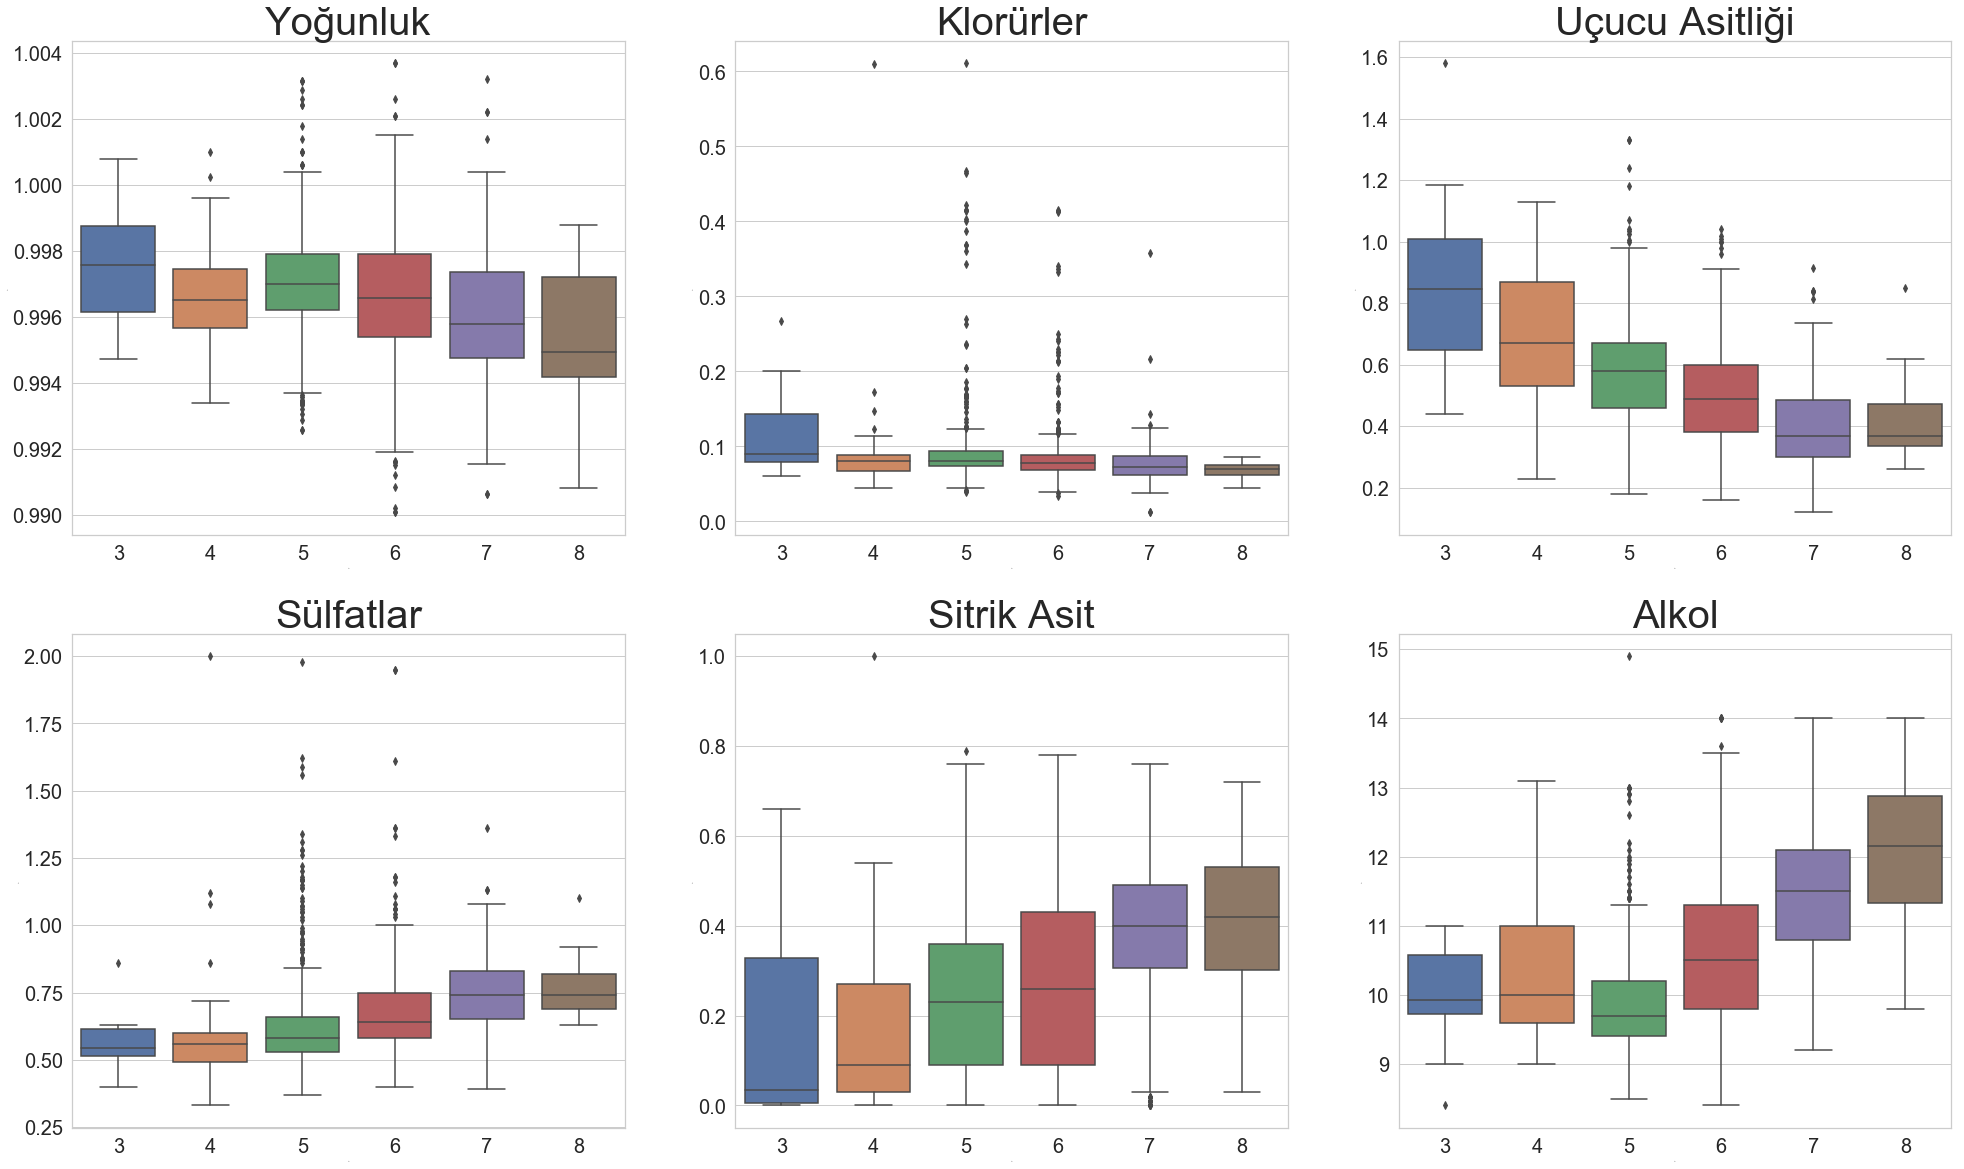

In [18]:
plotGraphics(featuresDF,2,3,"box")

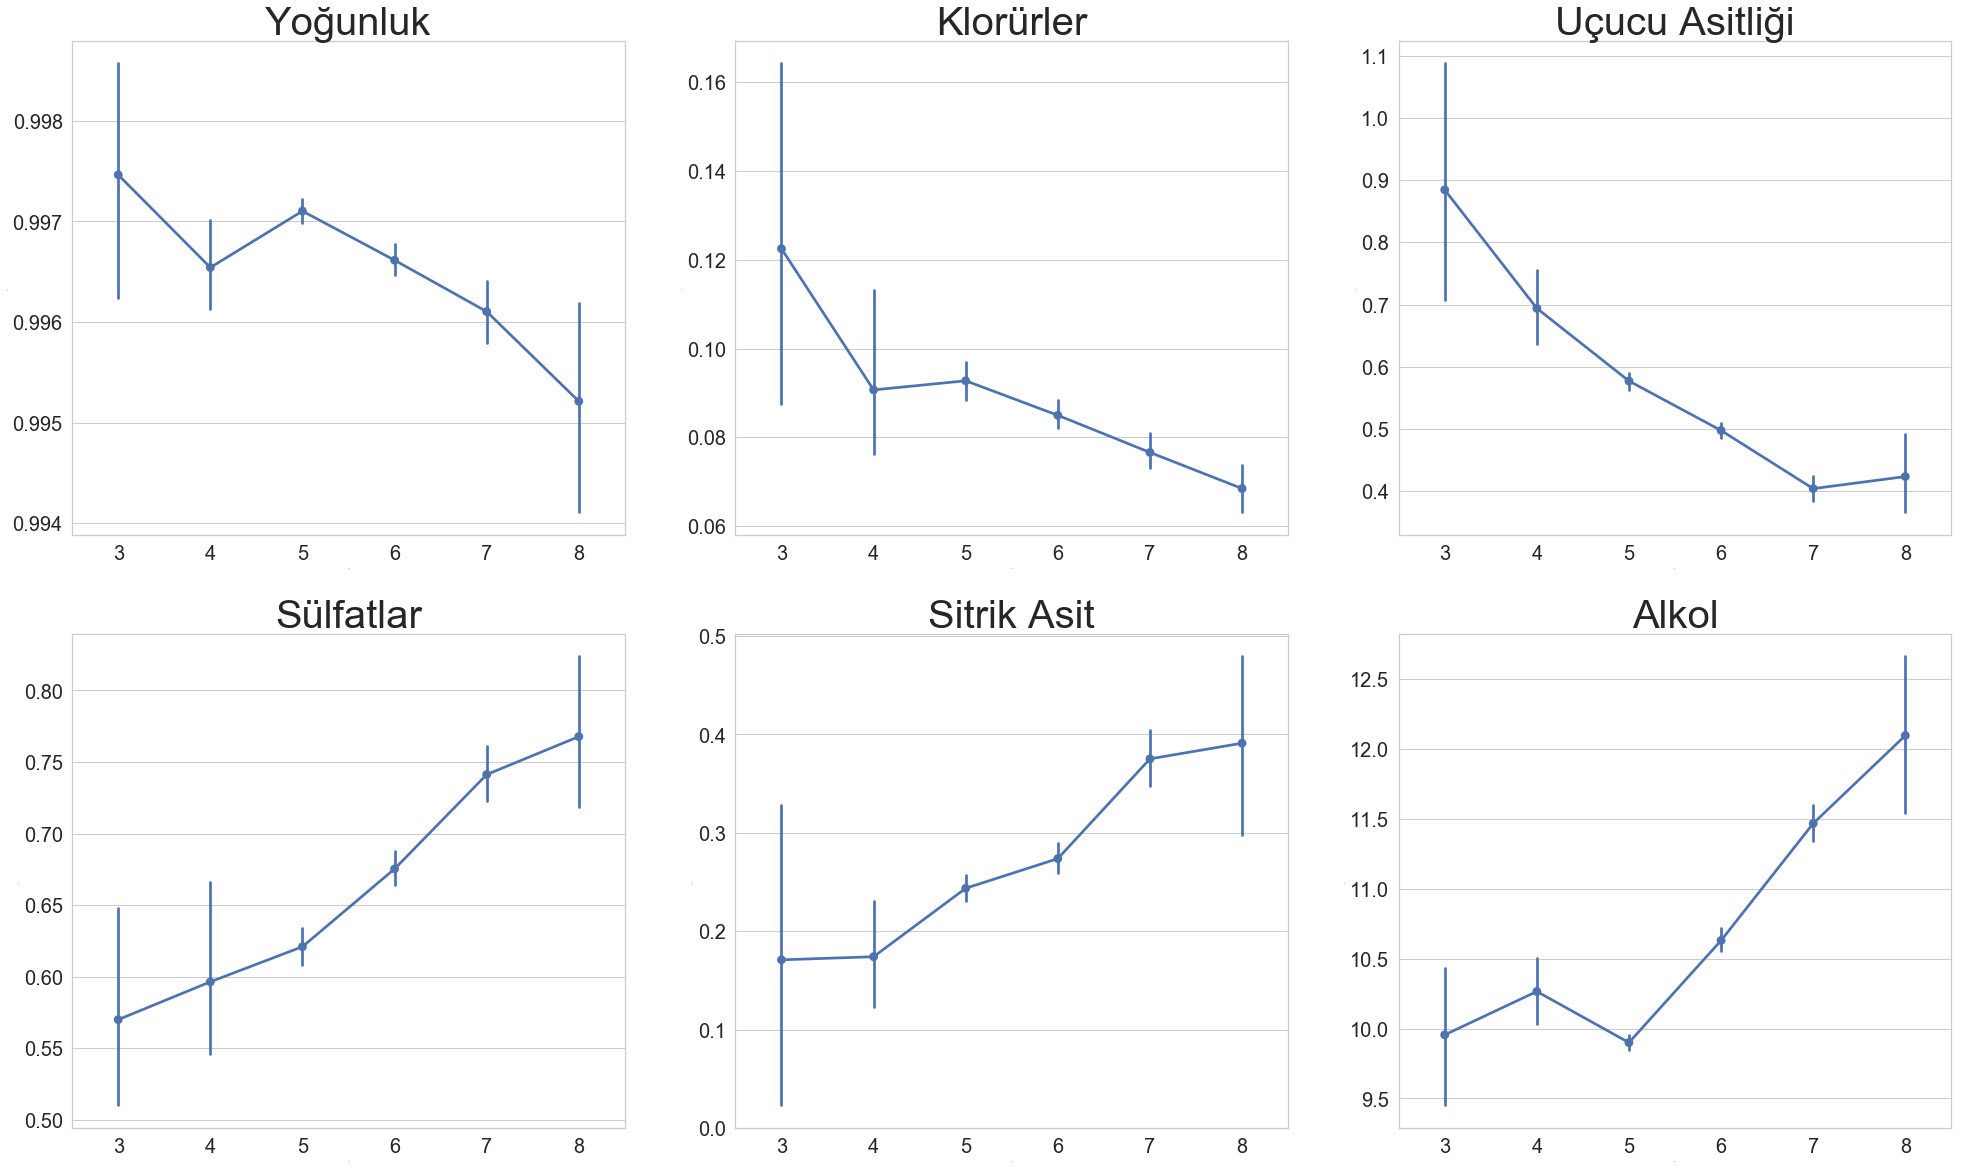

In [19]:
plotGraphics(featuresDF,2,3,"point")

In [20]:
trFeaturesData.head()

,yoğunluk,klorürler,uçucu asit,sülfatlar,sitrik asit,toplam sülfür dioksit,alkol oranı,kalite
0,0.9978,0.076,0.70,0.56,0.00,34.0,9.4,5
1,0.9968,0.098,0.88,0.68,0.00,67.0,9.8,5
2,0.9970,0.092,0.76,0.65,0.04,54.0,9.8,5
3,0.9980,0.075,0.28,0.58,0.56,60.0,9.8,6
4,0.9978,0.076,0.70,0.56,0.00,34.0,9.4,5


In [21]:
def print_confusion_matrix(confusion_matrix, class_names ,x,figsize = (17,15), fontsize=20):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d",annot_kws={"size": 20})
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Gerçek Değer',fontsize=20)
    plt.xlabel('Tahmini Değer',fontsize=20)
    plt.title(model,fontsize=30)
    plt.savefig(r"C:\Users\ABY\Desktop\Kodlar\Jupyter-Notebook\red-wine-fotolar"+"\\Foto"+str(x)+".jpeg",transparent=True)

In [22]:
X = trFeaturesData.drop(['kalite'], axis = 1)
y = trFeaturesData['kalite']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 76)

In [24]:
from collections import Counter
print("TRAIN",Counter(y_train))
print("TEST",Counter(y_test))

TRAIN Counter({5: 484, 6: 444, 7: 139, 4: 32, 8: 13, 3: 7})
TEST Counter({5: 197, 6: 194, 7: 60, 4: 21, 8: 5, 3: 3})


In [25]:
models=[LogisticRegression(),GaussianNB(),KNeighborsClassifier(),DecisionTreeClassifier(),SVC(kernel = 'rbf', random_state = 76),
            SVC(kernel='linear', random_state = 76),GradientBoostingClassifier(),RandomForestClassifier()]
modelNames=["Lojistik Regresyon","Gaussian Naive Bayes","En Yakın Komşu",
               "Karar Ağaçları","Destek Vektör Makinesi (RBF)",
              "Destek Vektör Makinesi (Lineer)","Gradient Boosting","Random Forest"]

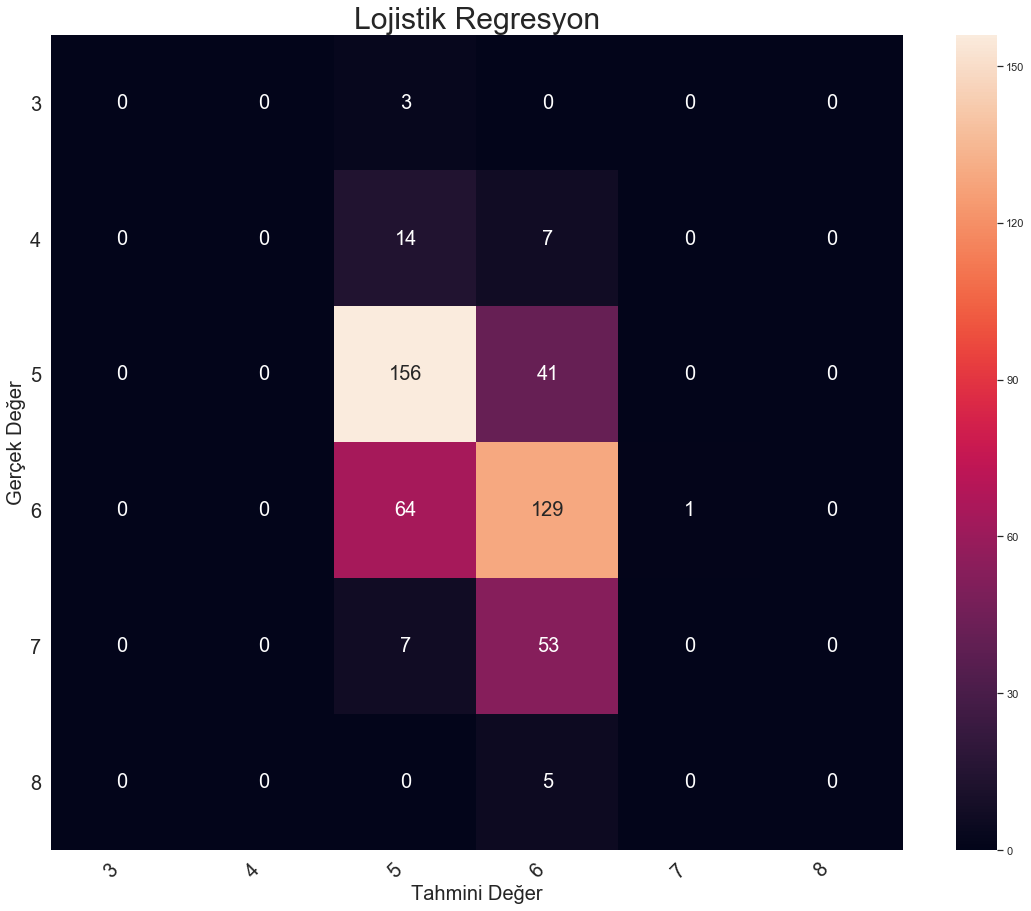

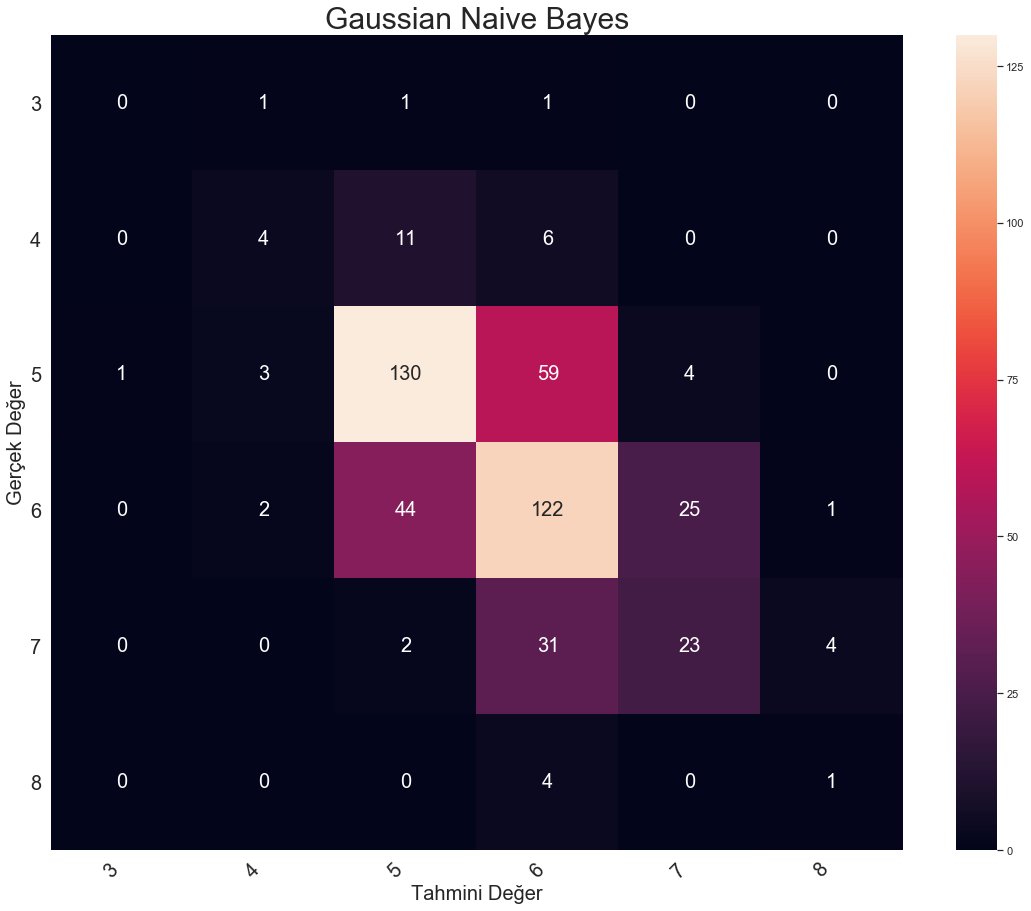

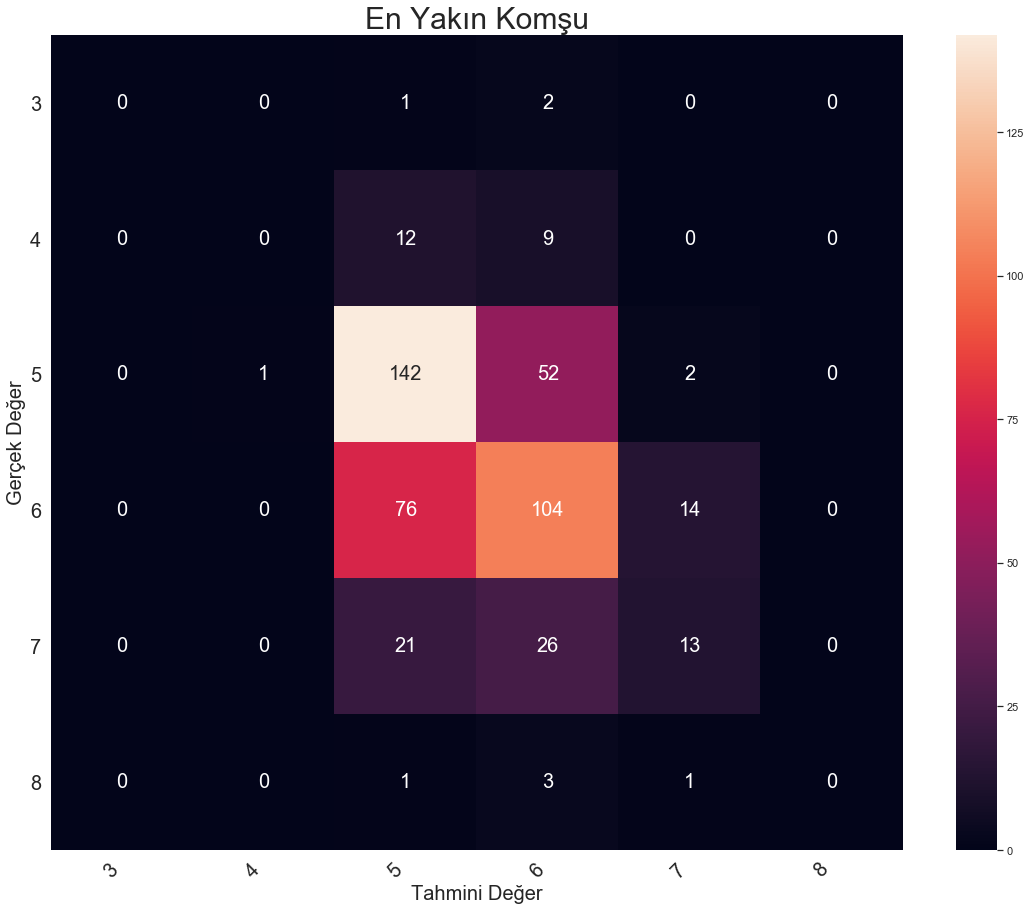

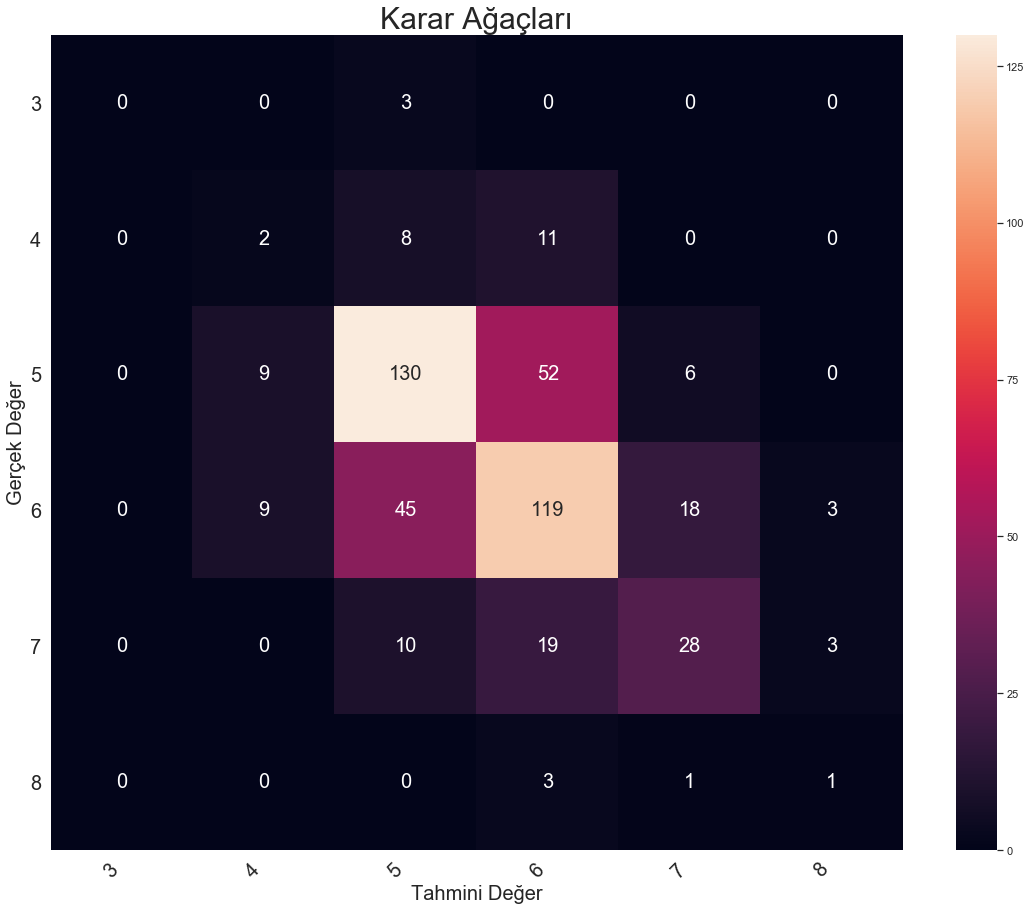

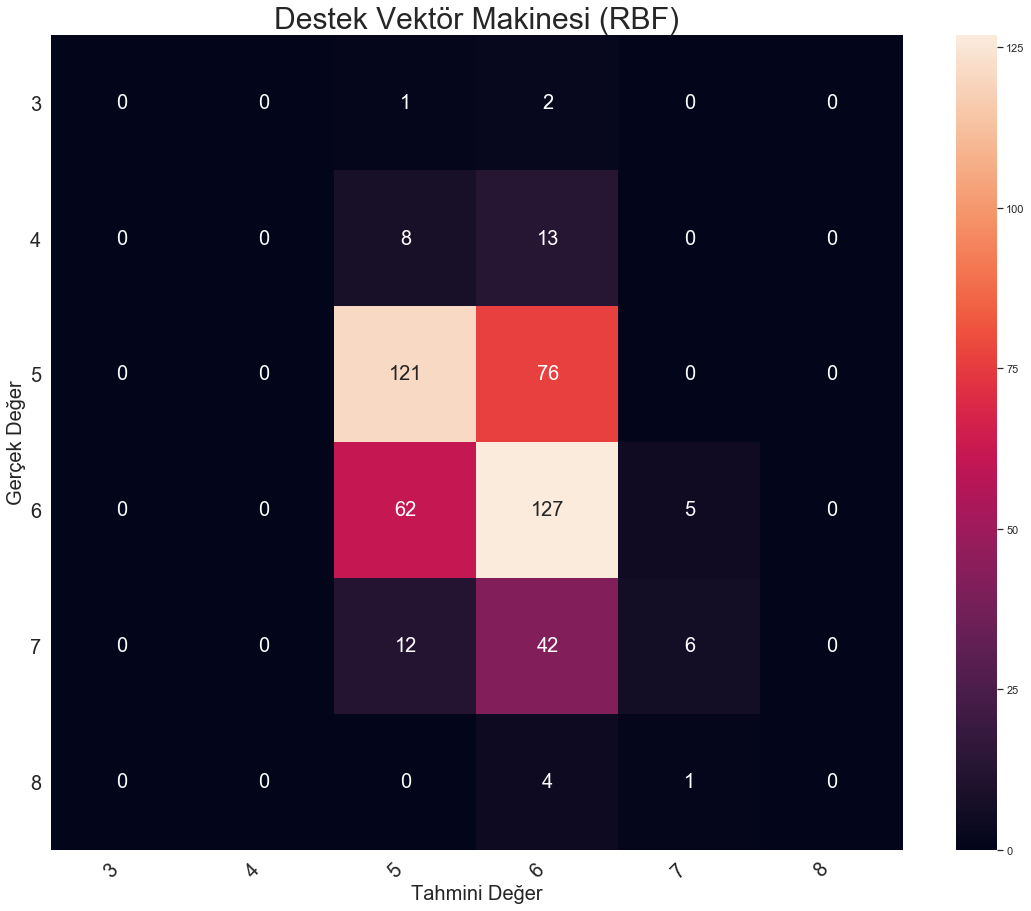

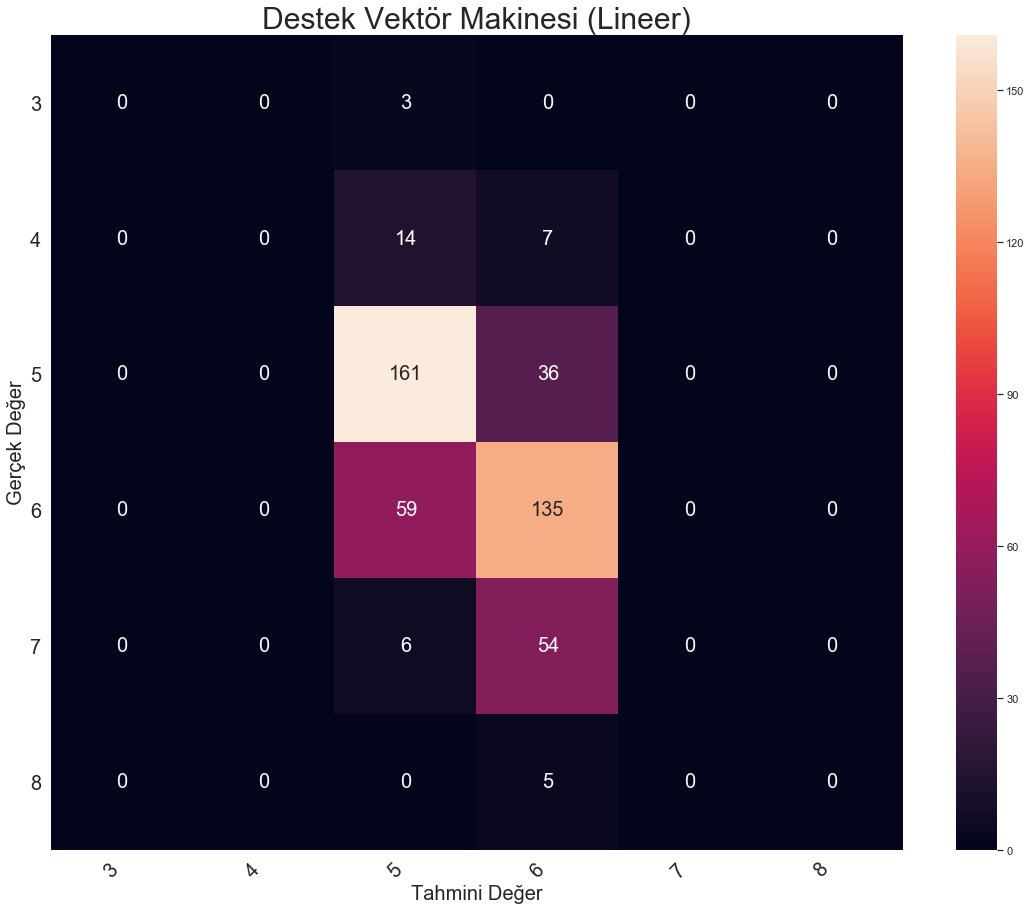

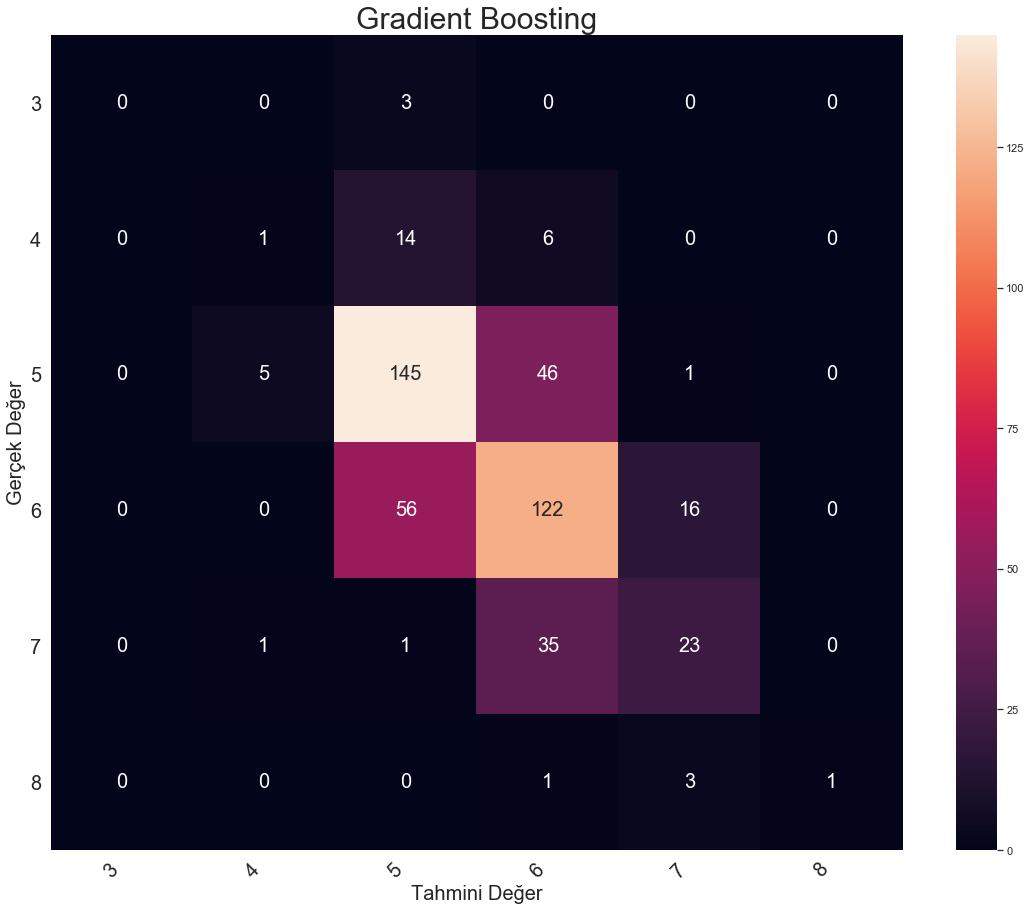

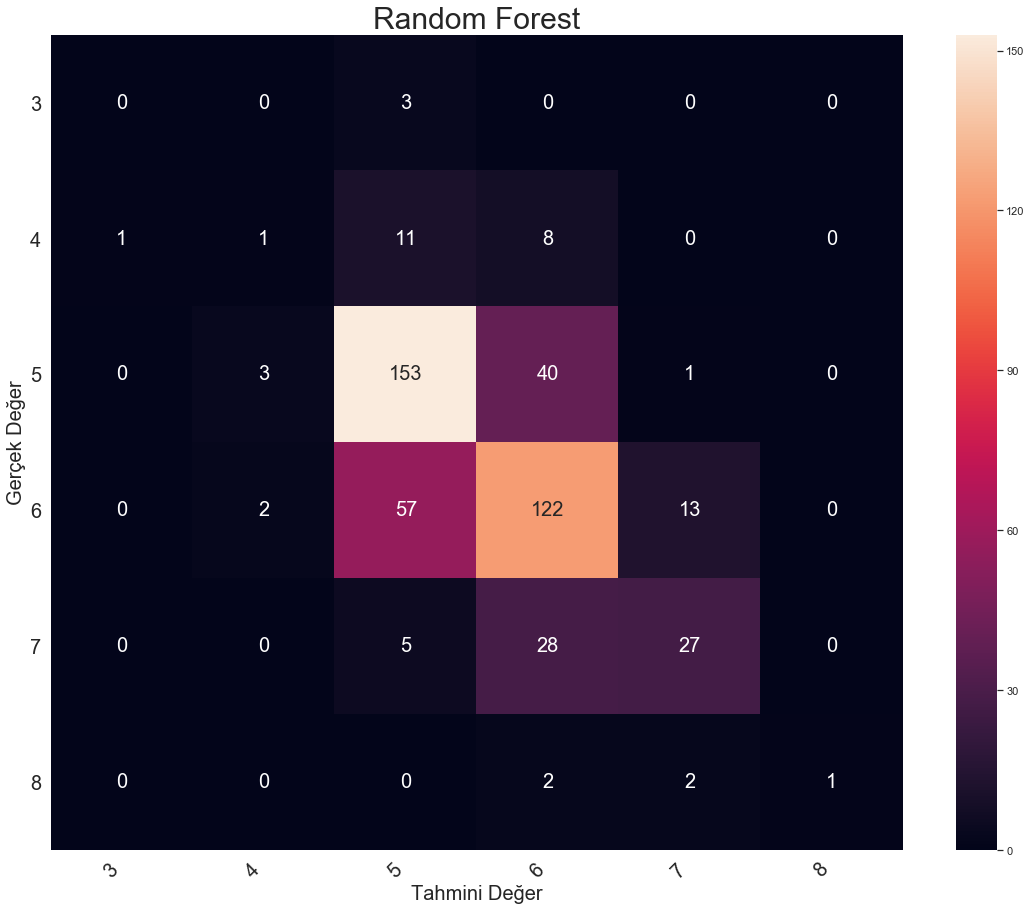

In [26]:
acc = []
i=0
for model in modelNames:
    clf = models[i]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc.append(accuracy_score(y_pred,y_test)*100)
    print_confusion_matrix(confusion_matrix(y_test, y_pred),np.unique(y_test),model)
    i+=1

In [27]:
d={'Model':modelNames,'Skor':acc}
acc_frame=pd.DataFrame(d)
acc_frame.sort_values(by='Skor', ascending=False)

,Model,Skor
7,Random Forest,63.333333
5,Destek Vektör Makinesi (Lineer),61.666667
6,Gradient Boosting,60.833333
0,Lojistik Regresyon,59.375000
1,Gaussian Naive Bayes,58.333333
3,Karar Ağaçları,58.333333
2,En Yakın Komşu,53.958333
4,Destek Vektör Makinesi (RBF),52.916667


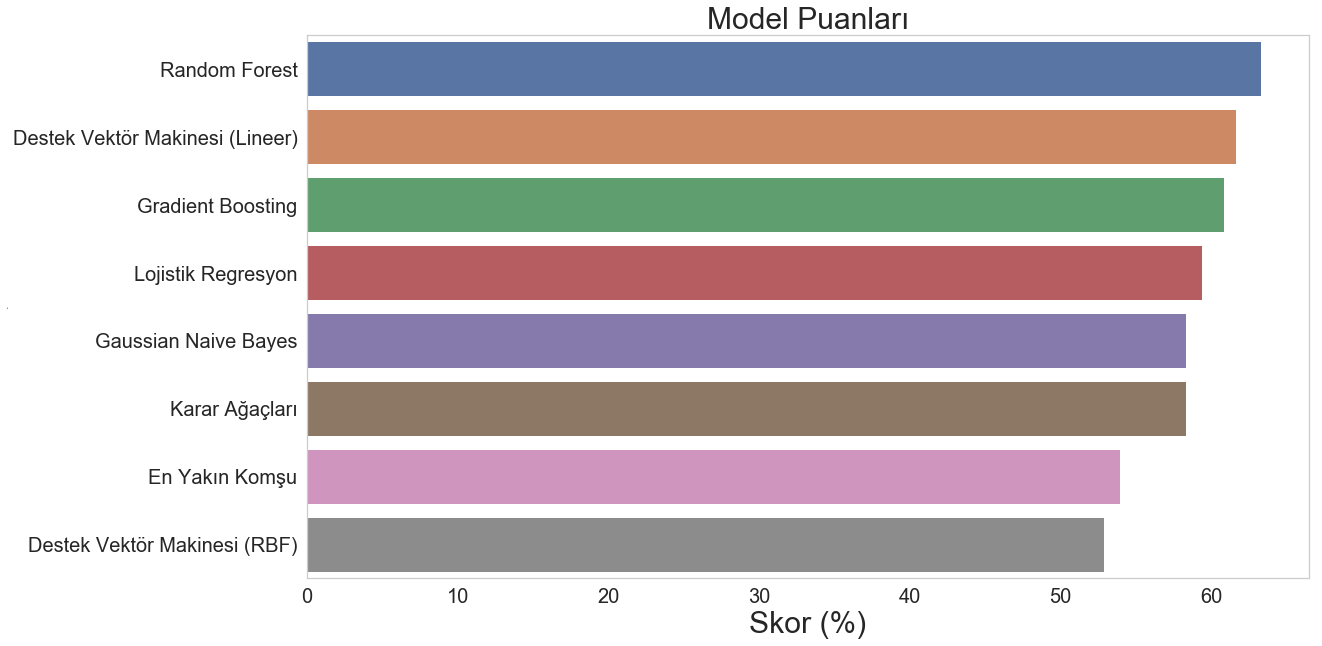

In [28]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(16,10)
sns.barplot(y='Model',x='Skor',data=acc_frame.sort_values(by='Skor', ascending=False))
ax.set_title("Model Puanları",fontsize=30)
ax.set_xlabel('Skor (%)',fontsize=30)
ax.set_ylabel('Miktar',fontsize=0)
ax.tick_params(labelsize=20)
ax.grid(False)
plt.show()

In [29]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
scModelNames=["Lojistik Regresyon ve Standart Scaler",
              "Gaussian Naive Bayes ve Standart Scaler",
              "En Yakın Komşu ve Standart Scaler",
              "Karar Ağaçları ve Standart Scaler",
              "Destek Vektör Makinesi (RBF) ve Standart Scaler",
              "Destek Vektör Makinesi (Lineer) ve Standart Scaler",
              "Gradient Boosting ve Standart Scaler",
              "Random Forest ve Standart Scaler"]

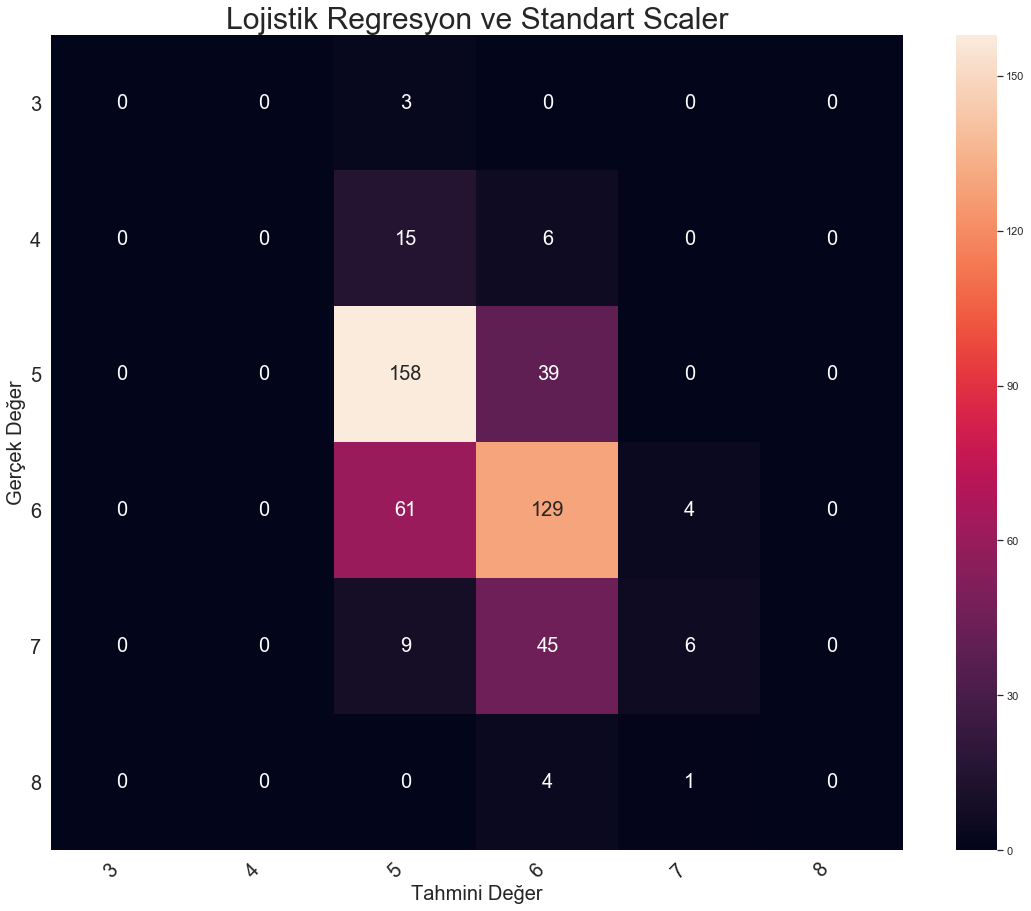

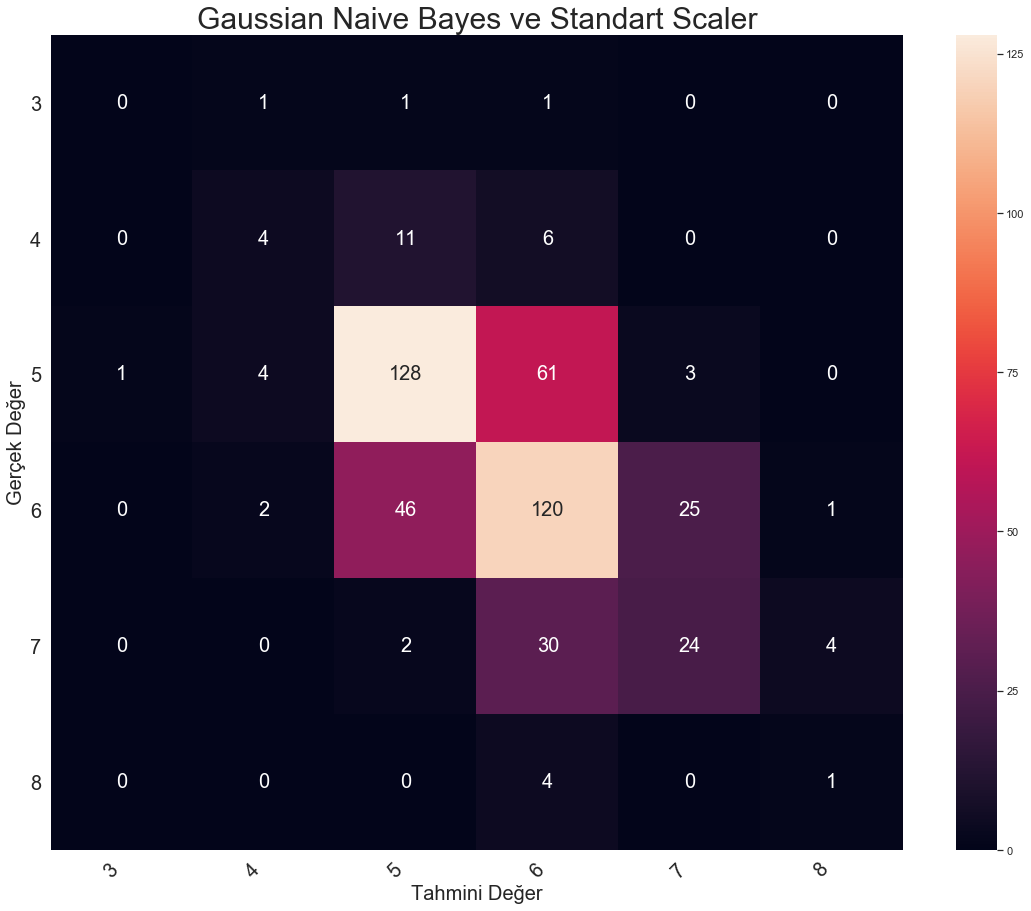

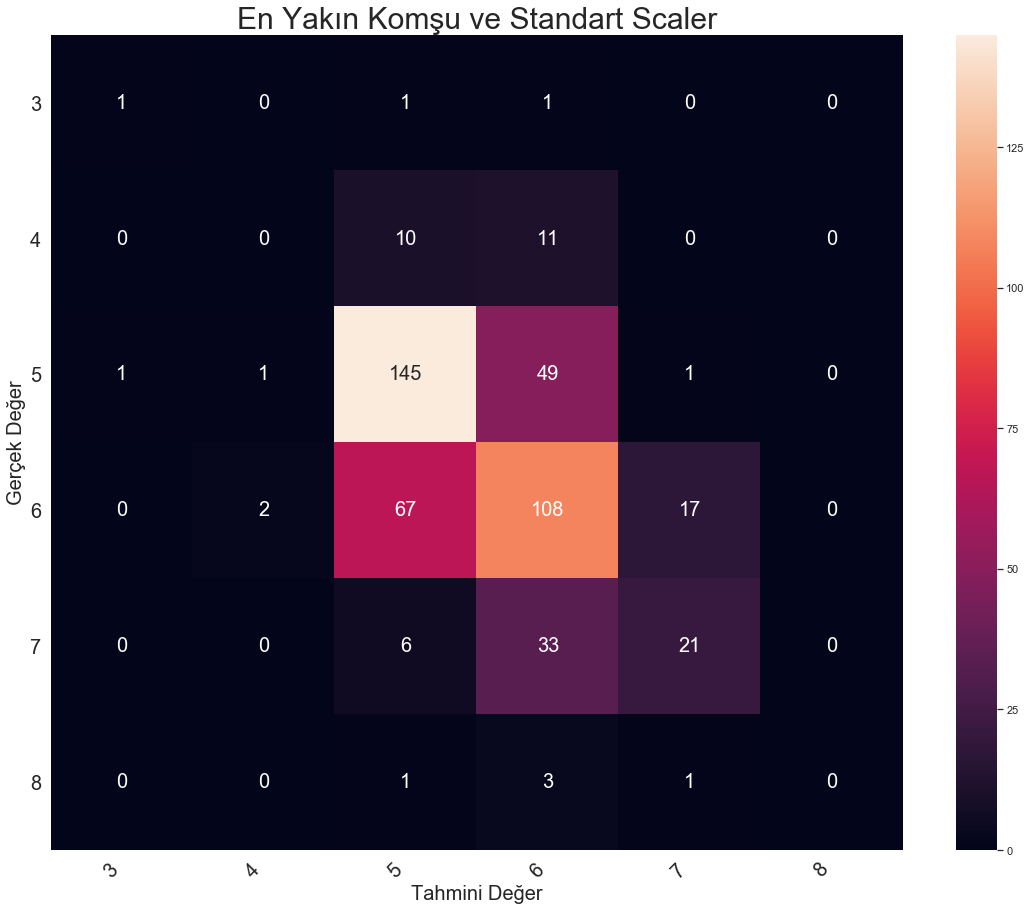

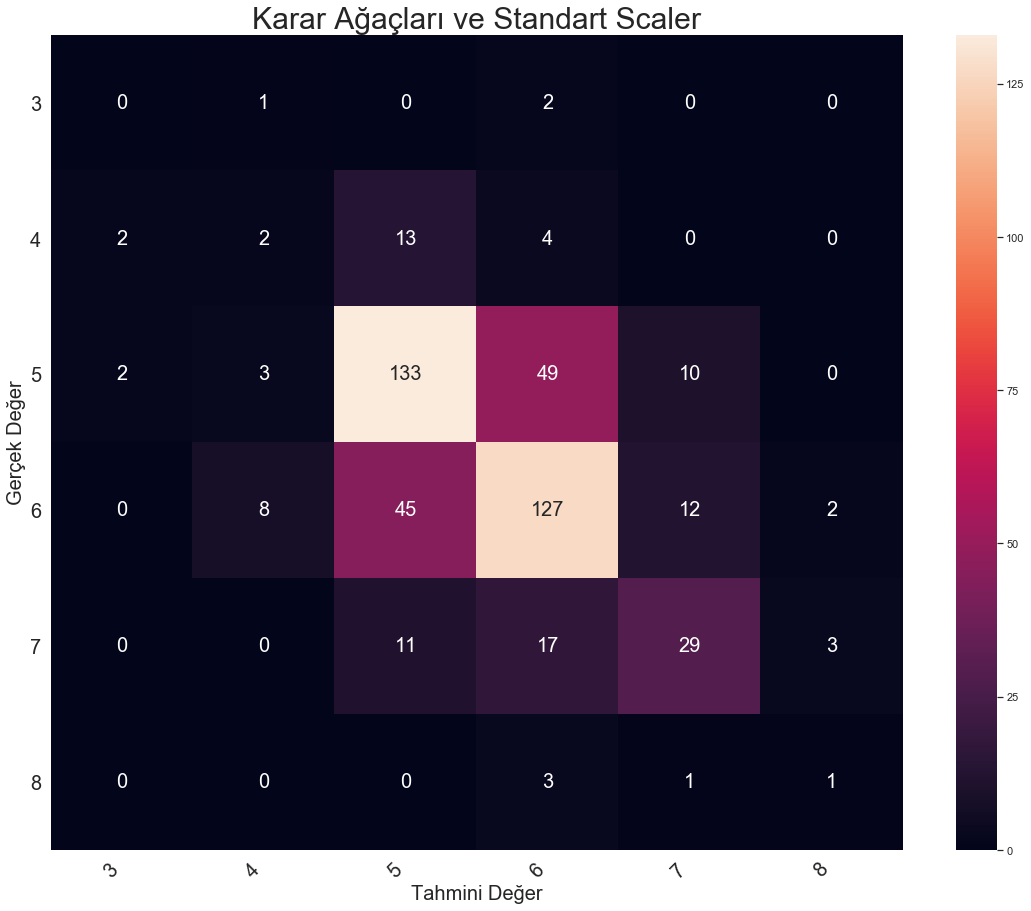

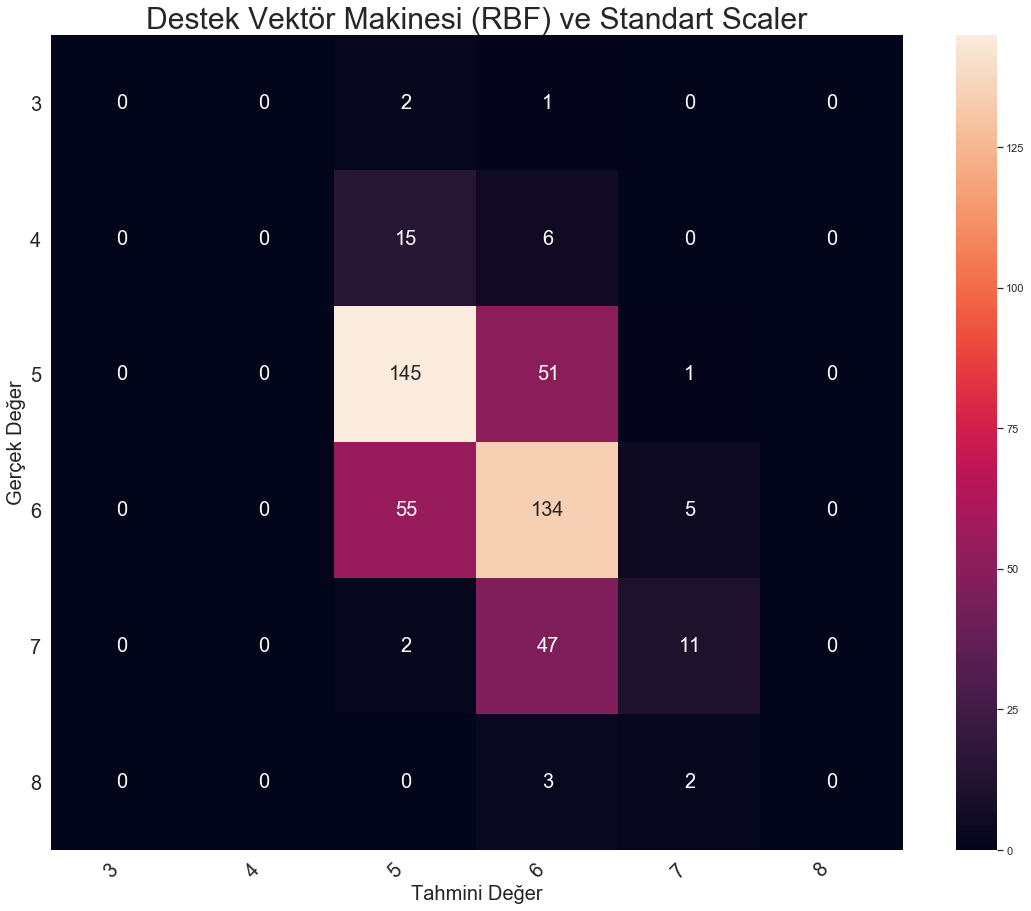

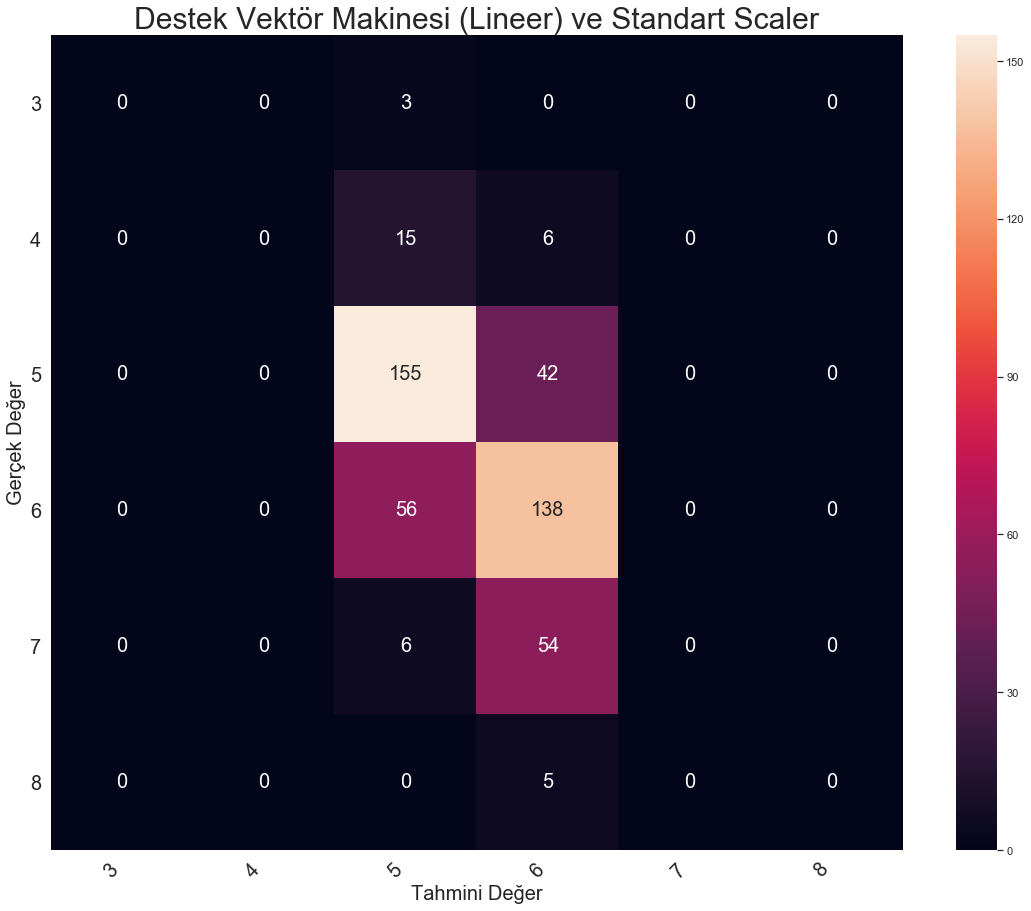

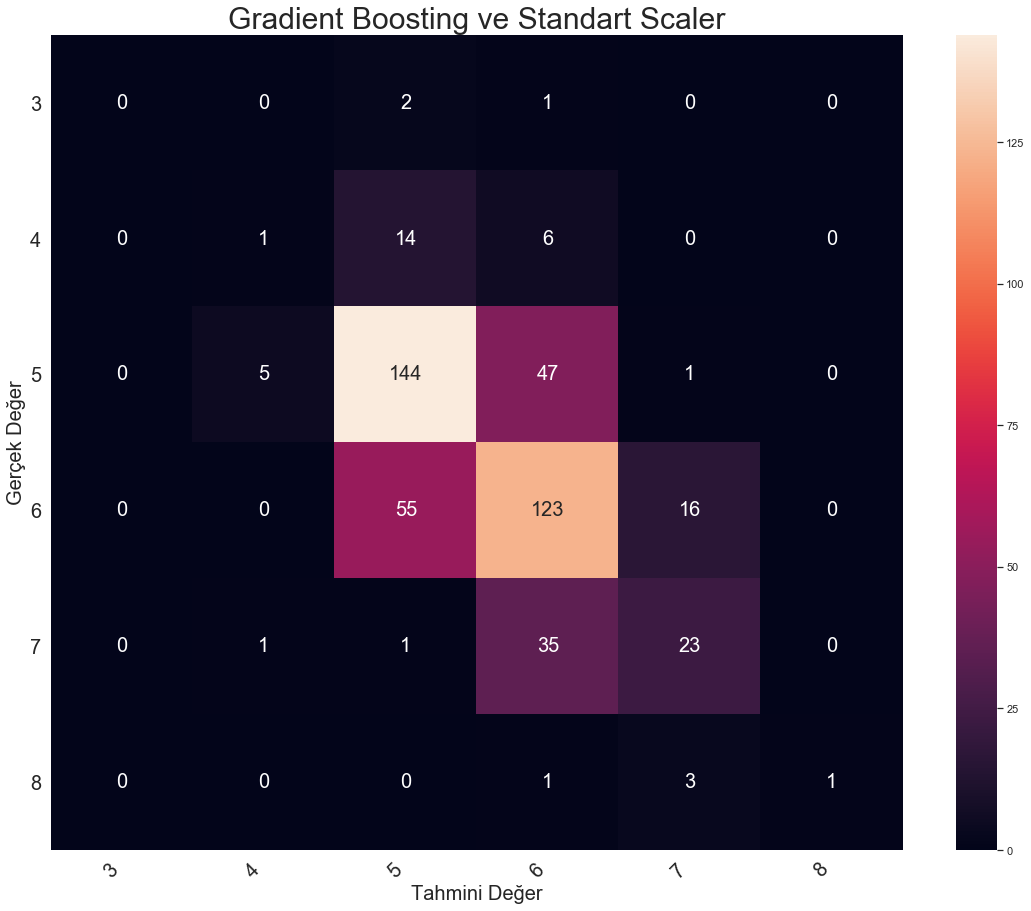

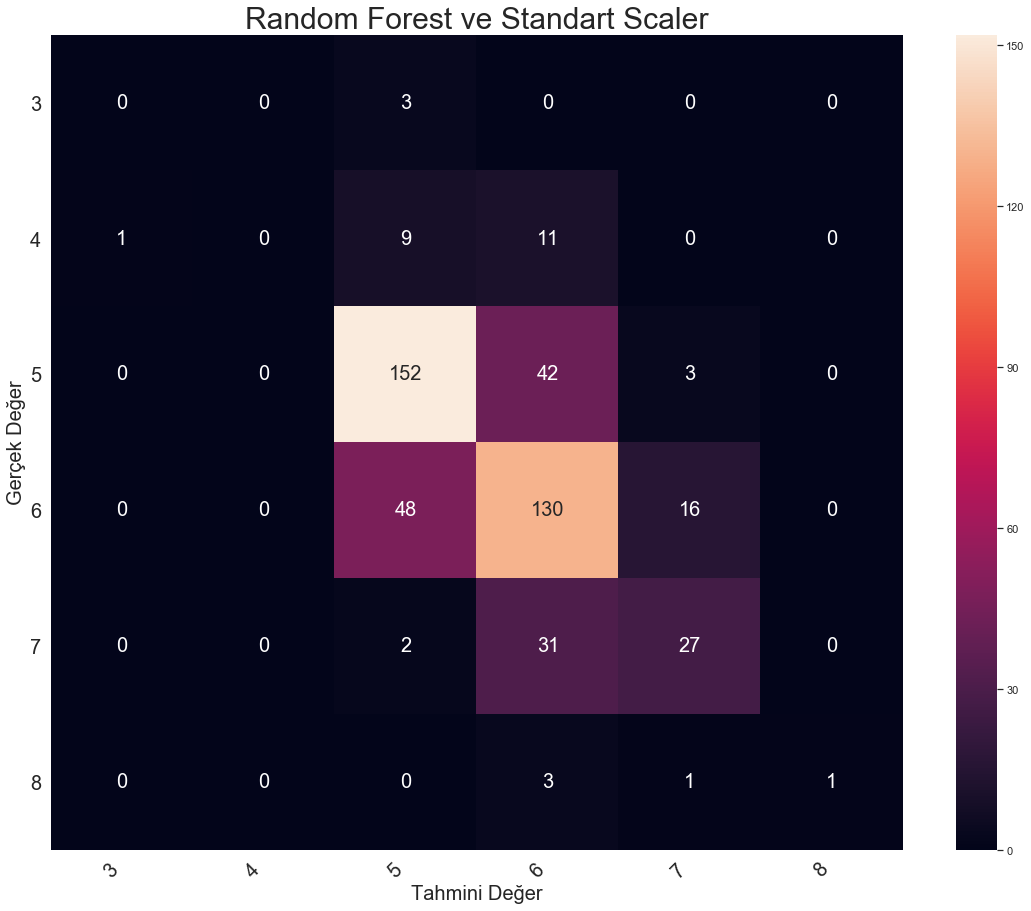

In [31]:
scAcc = []
i=0
for model in scModelNames:
    clf = models[i]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scAcc.append(accuracy_score(y_pred,y_test)*100)
    print_confusion_matrix(confusion_matrix(y_test, y_pred),np.unique(y_test),model)
    i+=1

In [32]:
d={'Model':modelNames,'Skor':scAcc}
scAcc_frame=pd.DataFrame(d)
scAcc_frame.sort_values(by='Skor', ascending=False)

,Model,Skor
7,Random Forest,64.583333
0,Lojistik Regresyon,61.041667
5,Destek Vektör Makinesi (Lineer),61.041667
3,Karar Ağaçları,60.833333
6,Gradient Boosting,60.833333
4,Destek Vektör Makinesi (RBF),60.416667
1,Gaussian Naive Bayes,57.708333
2,En Yakın Komşu,57.291667


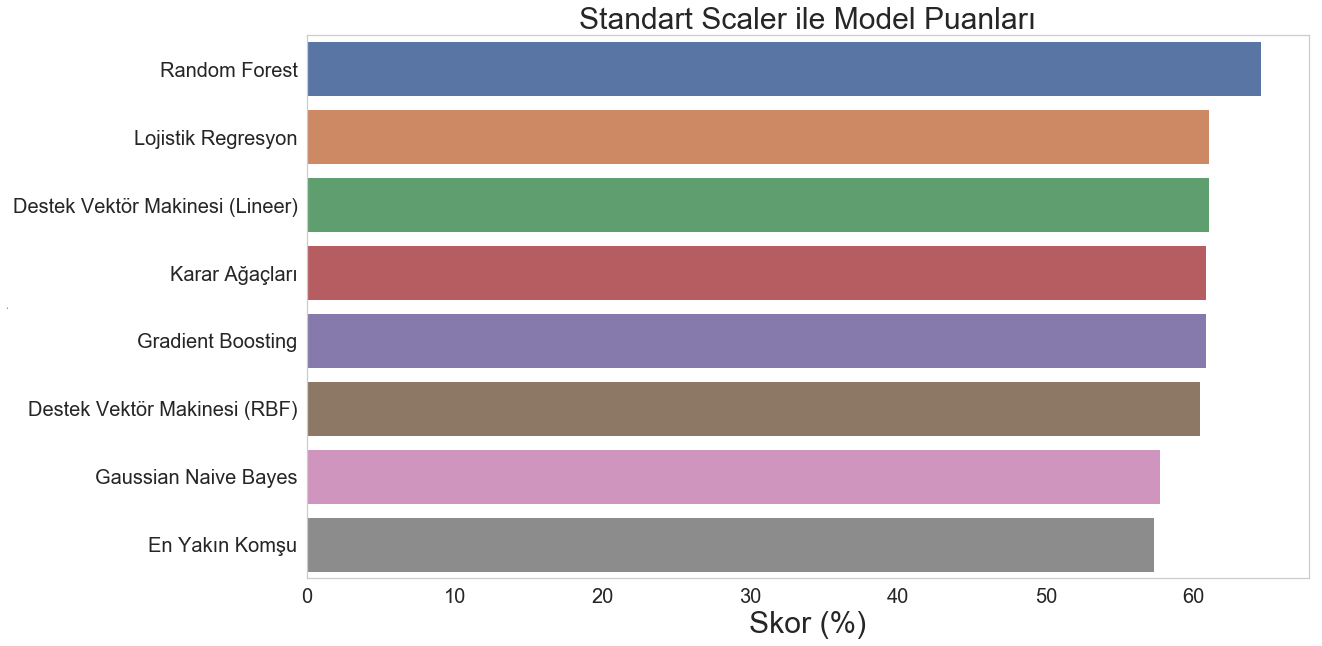

In [33]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(16,10)
sns.barplot(y='Model',x='Skor',data=scAcc_frame.sort_values(by='Skor', ascending=False))
ax.set_title("Standart Scaler ile Model Puanları",fontsize=30)
ax.set_xlabel('Skor (%)',fontsize=30)
ax.set_ylabel('Miktar',fontsize=0)
ax.tick_params(labelsize=20)
ax.grid(False)
plt.show()

In [34]:
totalAcc = acc_frame.copy()
totalAcc["Standart Scaler Skor"] = np.array(scAcc)
totalAcc

,Model,Skor,Standart Scaler Skor
0,Lojistik Regresyon,59.375000,61.041667
1,Gaussian Naive Bayes,58.333333,57.708333
2,En Yakın Komşu,53.958333,57.291667
3,Karar Ağaçları,58.333333,60.833333
4,Destek Vektör Makinesi (RBF),52.916667,60.416667
5,Destek Vektör Makinesi (Lineer),61.666667,61.041667
6,Gradient Boosting,60.833333,60.833333
7,Random Forest,63.333333,64.583333


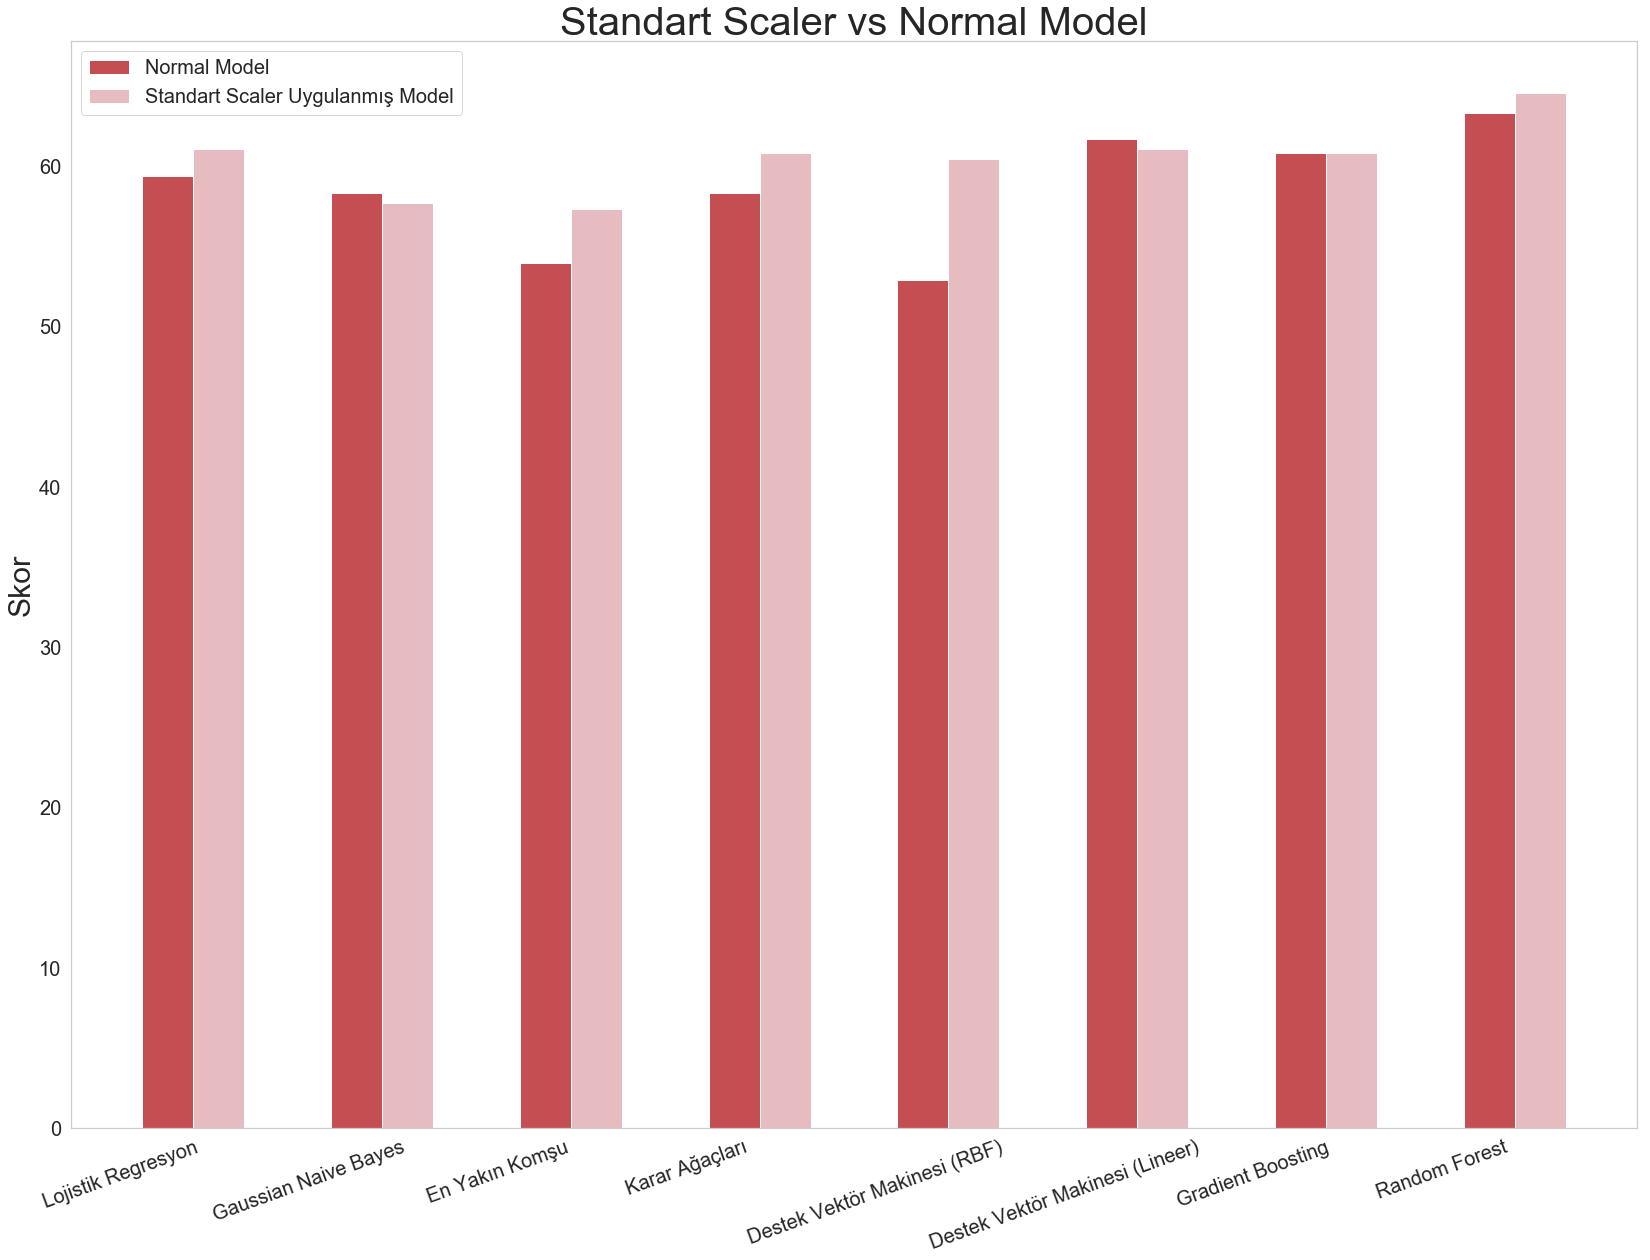

In [35]:
N = 8
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (25,20));

yvals = totalAcc.Skor
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = totalAcc["Standart Scaler Skor"]
rects2 = ax.bar(ind+width, zvals, width, color='#e6bcc0')

ax.set_ylabel('Skor',fontsize=30)
ax.set_title("Standart Scaler vs Normal Model",fontsize=40)
ax.set_xticks(ind-0.25)
ax.tick_params(labelsize=20)
ax.set_xticklabels( ("Lojistik Regresyon","Gaussian Naive Bayes","En Yakın Komşu",
               "Karar Ağaçları","Destek Vektör Makinesi (RBF)",
              "Destek Vektör Makinesi (Lineer)","Gradient Boosting","Random Forest") ,fontsize=20,rotation = 20)
ax.legend( (rects1[0], rects2[0]), ('Normal Model', 'Standart Scaler Uygulanmış Model') ,fontsize=20)

ax.grid(False)

plt.show()

In [36]:
trYeniData = trFeaturesData.copy()
yeniData = featuresDF.copy()
bins = (2,6.5,8)
group_names = ['kötü','iyi']

categories = pd.cut(trFeaturesData['kalite'], bins, labels = group_names)
trYeniData['kalite'] = categories

categories = pd.cut(featuresDF['quality'], bins, labels = group_names)
yeniData['quality'] = categories

trYeniData.head()

,yoğunluk,klorürler,uçucu asit,sülfatlar,sitrik asit,toplam sülfür dioksit,alkol oranı,kalite
0,0.9978,0.076,0.70,0.56,0.00,34.0,9.4,kötü
1,0.9968,0.098,0.88,0.68,0.00,67.0,9.8,kötü
2,0.9970,0.092,0.76,0.65,0.04,54.0,9.8,kötü
3,0.9980,0.075,0.28,0.58,0.56,60.0,9.8,kötü
4,0.9978,0.076,0.70,0.56,0.00,34.0,9.4,kötü


In [37]:
trYeniData['kalite'].value_counts()

kötü    1382
iyi      217
Name: kalite, dtype: int64

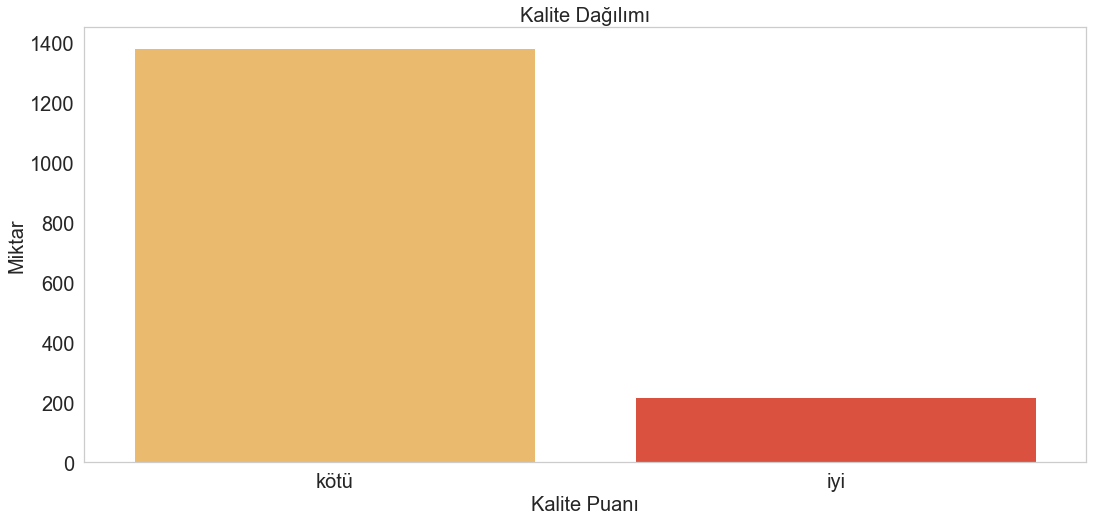

In [38]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(16,8)
sns.countplot(x = "kalite"  ,data=trYeniData , palette = sns.color_palette("YlOrRd", 2))
ax.set_title("Kalite Dağılımı",fontsize=20)
ax.set_xlabel('Kalite Puanı',fontsize=20)
ax.set_ylabel('Miktar',fontsize=20)
ax.tick_params(labelsize=20)
ax.grid(False)
plt.show()

In [39]:
yeniData.head()

,density,chlorides,volatile acidity,sulphates,citric acid,alcohol,quality
0,0.9978,0.076,0.70,0.56,0.00,9.4,kötü
1,0.9968,0.098,0.88,0.68,0.00,9.8,kötü
2,0.9970,0.092,0.76,0.65,0.04,9.8,kötü
3,0.9980,0.075,0.28,0.58,0.56,9.8,kötü
4,0.9978,0.076,0.70,0.56,0.00,9.4,kötü


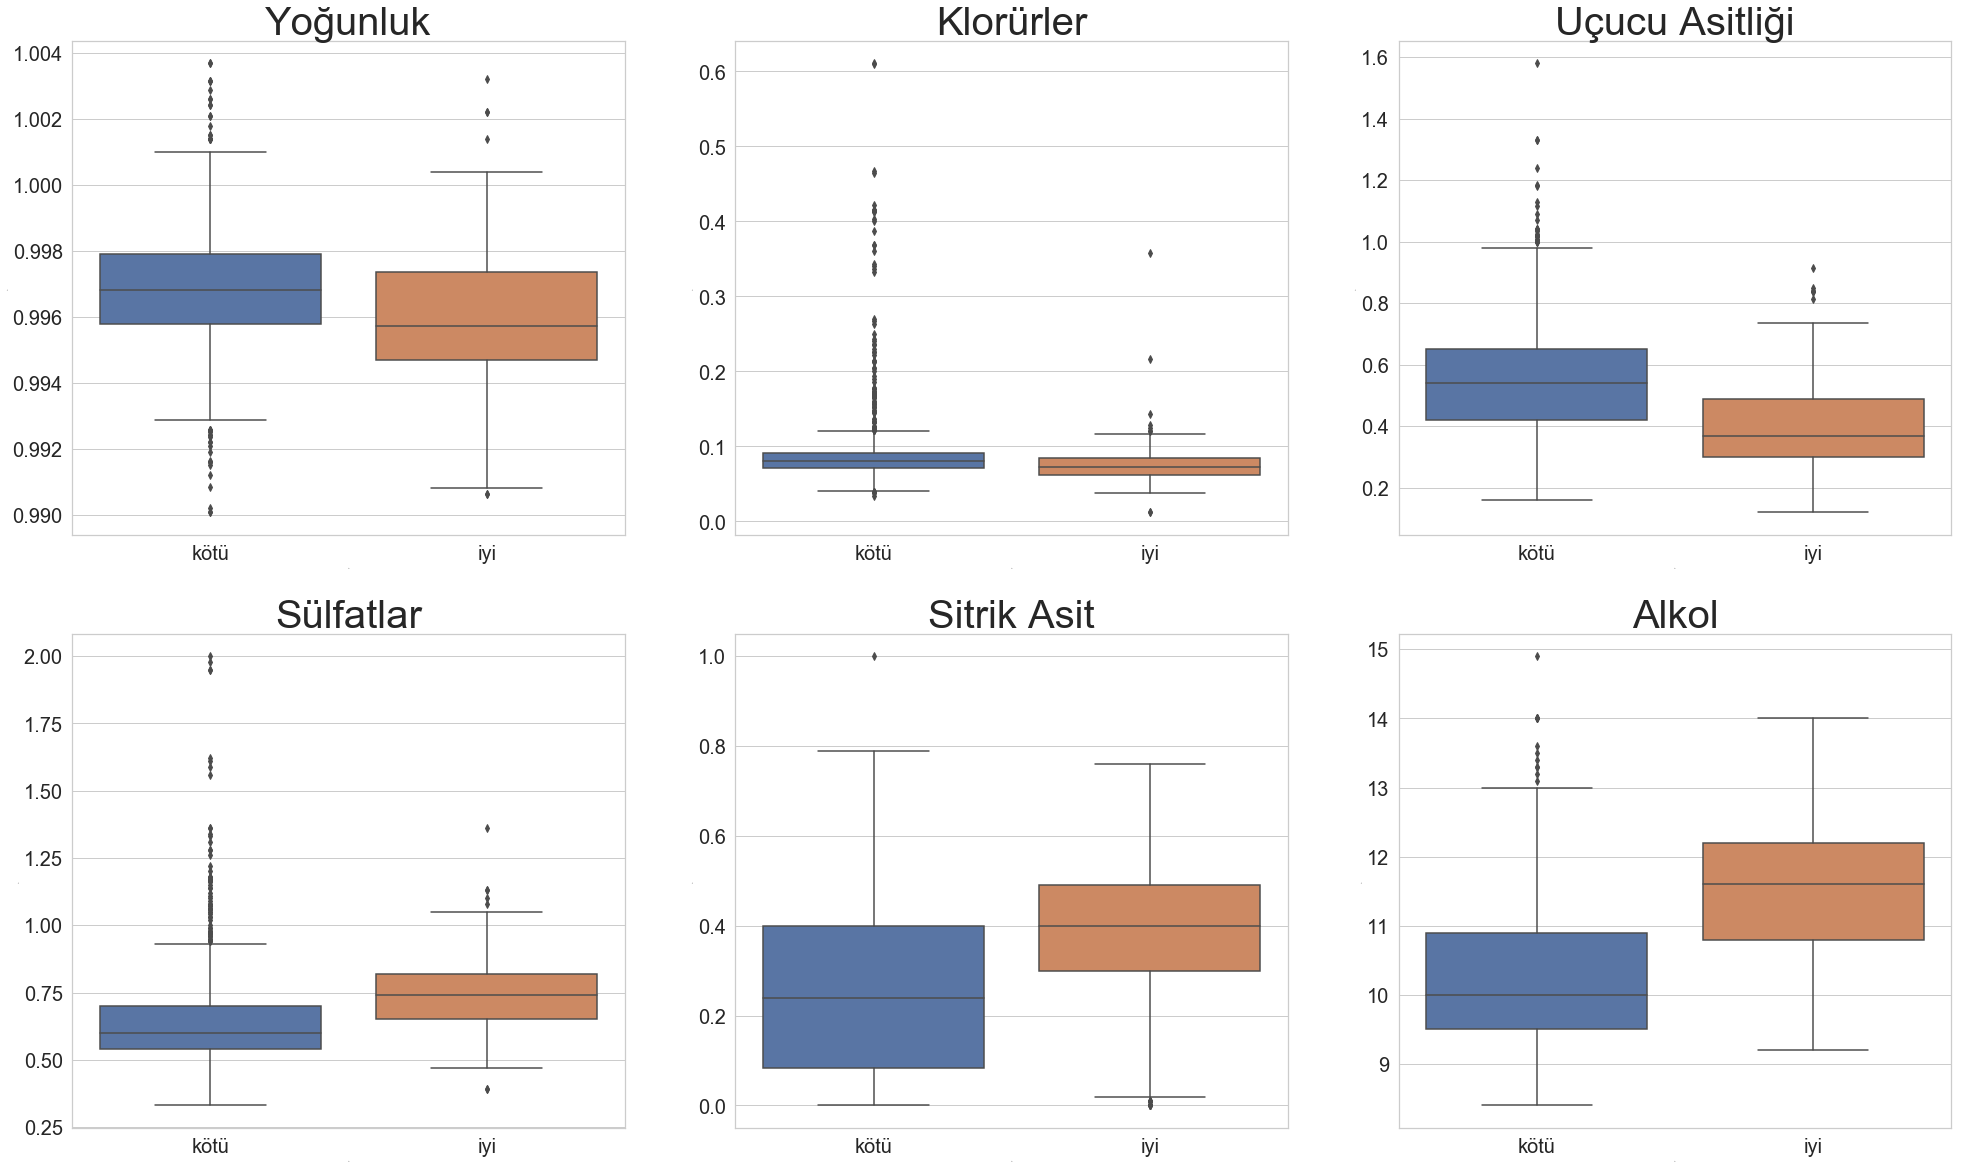

In [40]:
plotGraphics(yeniData,2,3,"box")

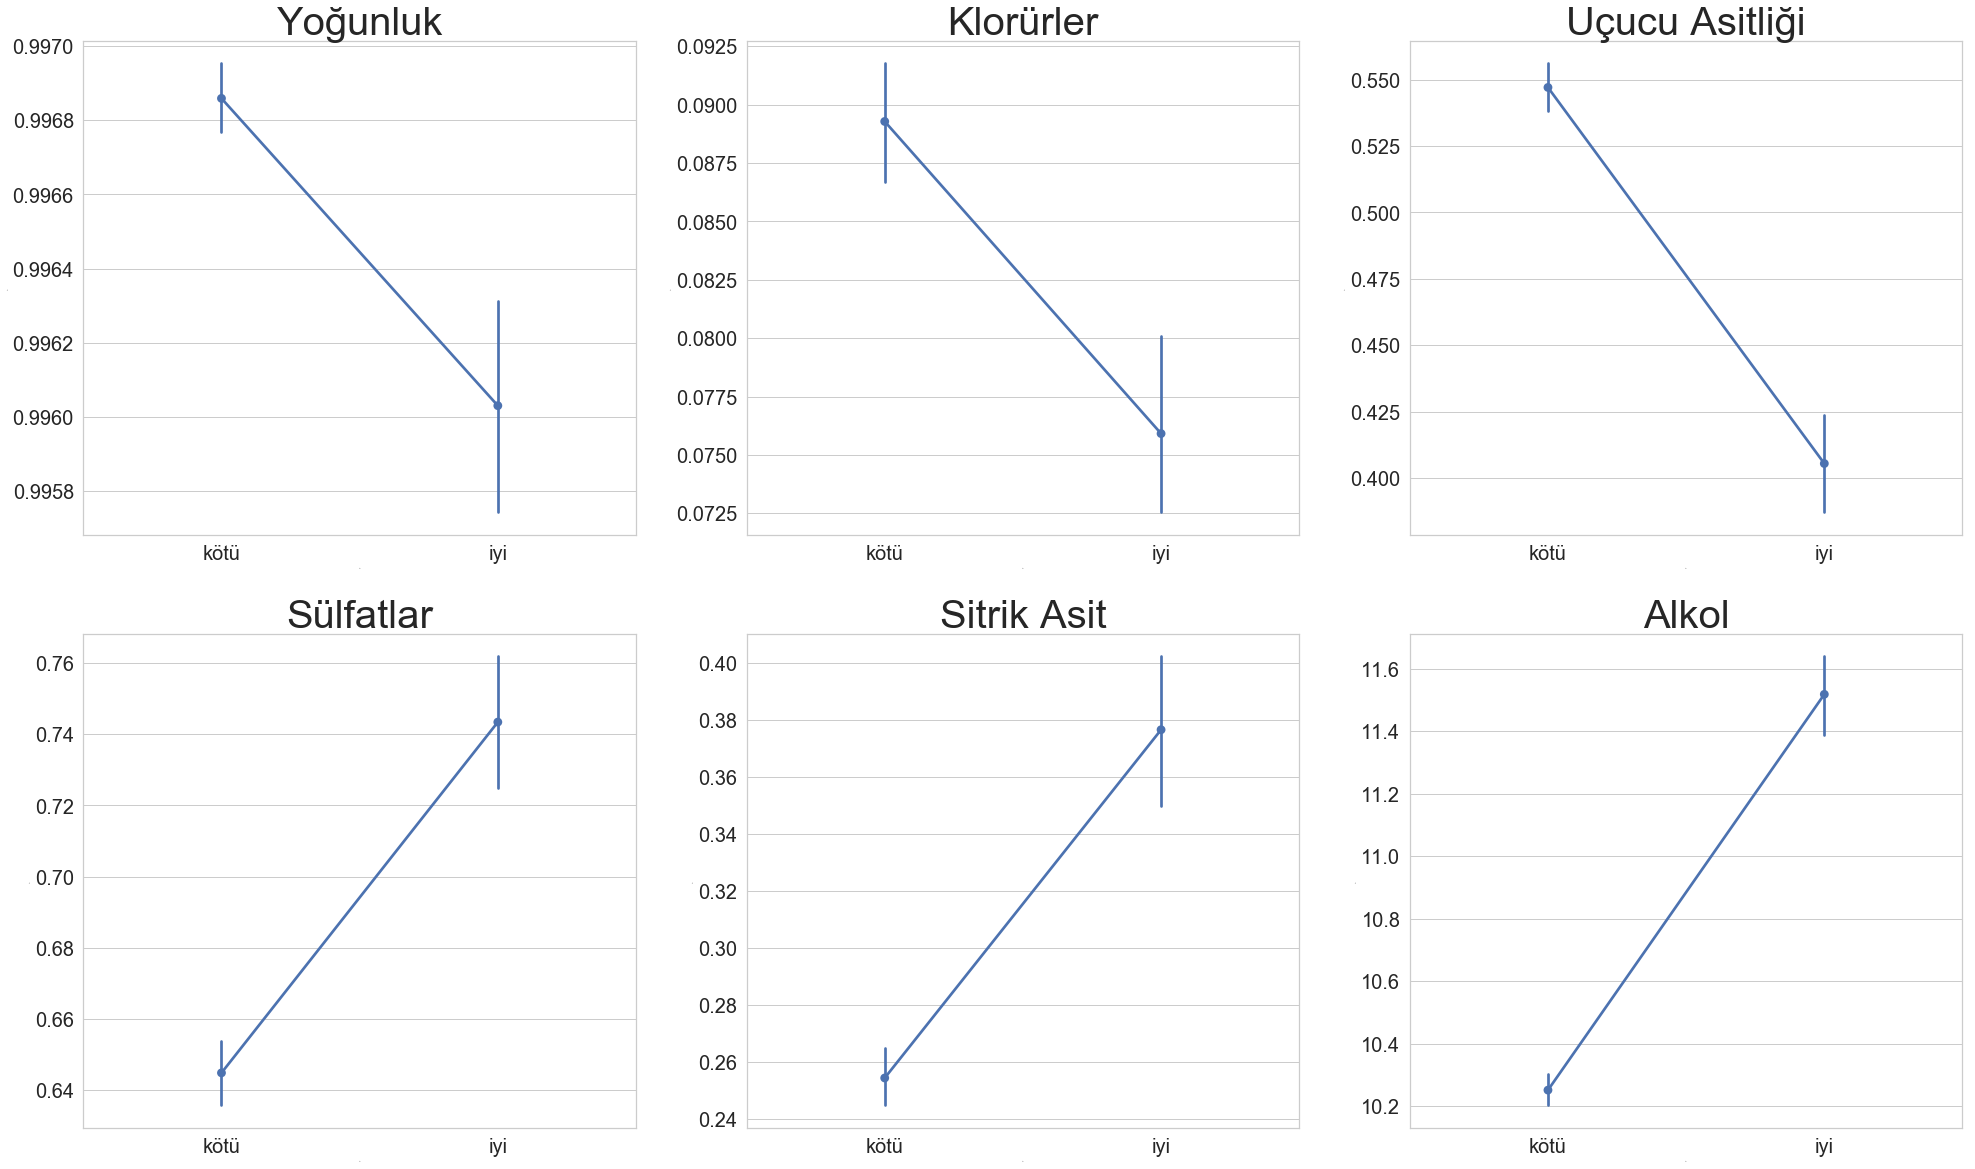

In [41]:
plotGraphics(yeniData,2,3,"point")

In [42]:
X = trYeniData.drop(['kalite'], axis = 1)
y = trYeniData['kalite']

In [43]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 76)

In [45]:
print("TRAIN",Counter(y_train))
print("TEST",Counter(y_test))

TRAIN Counter({1: 967, 0: 152})
TEST Counter({1: 415, 0: 65})


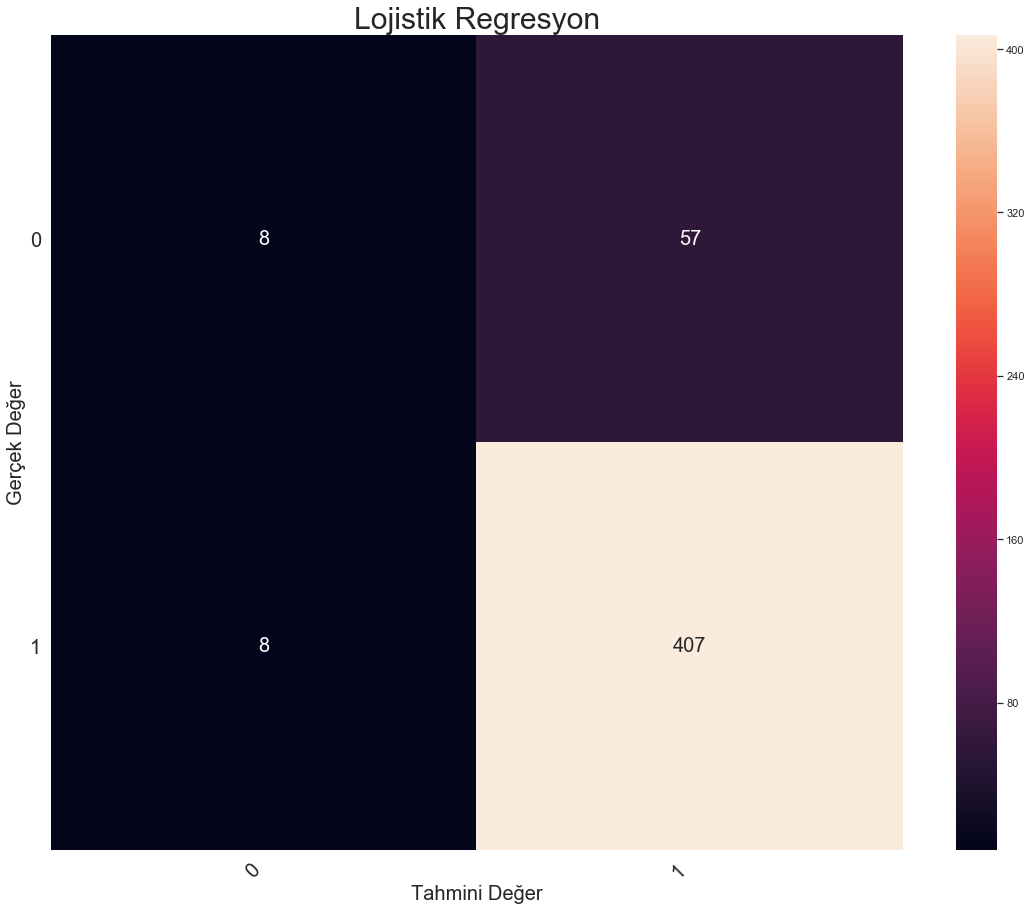

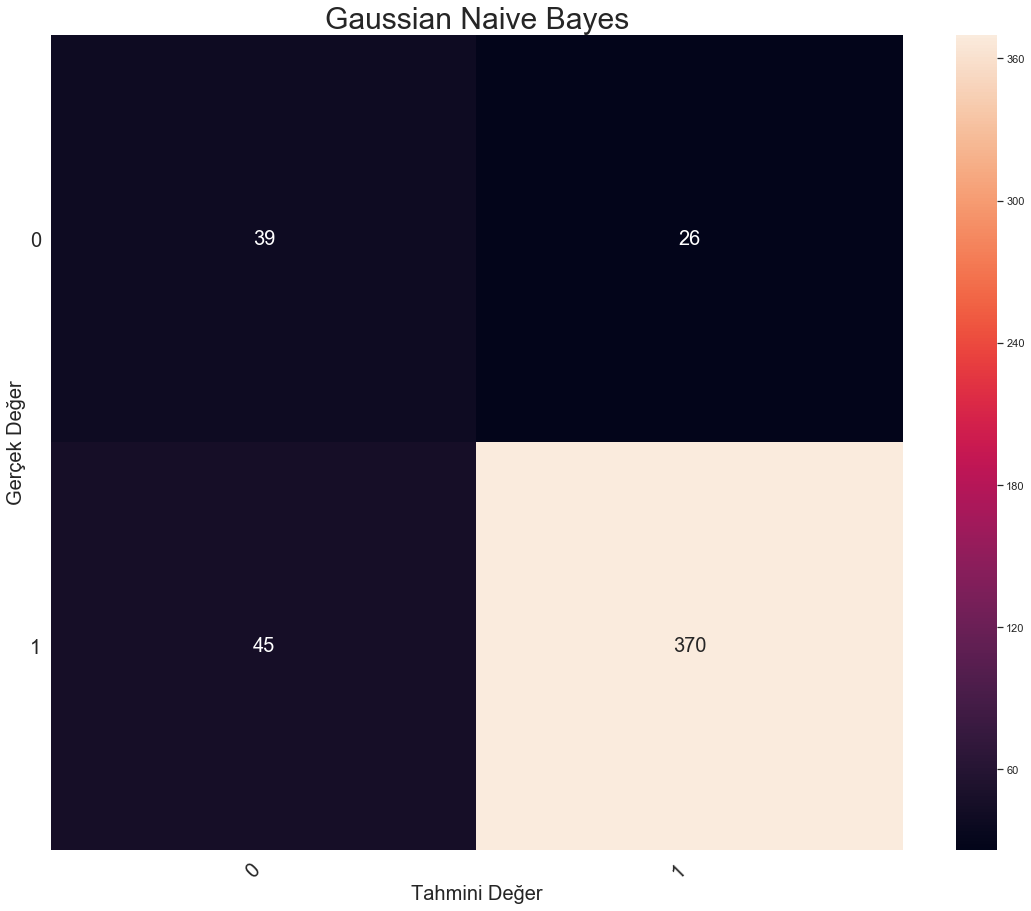

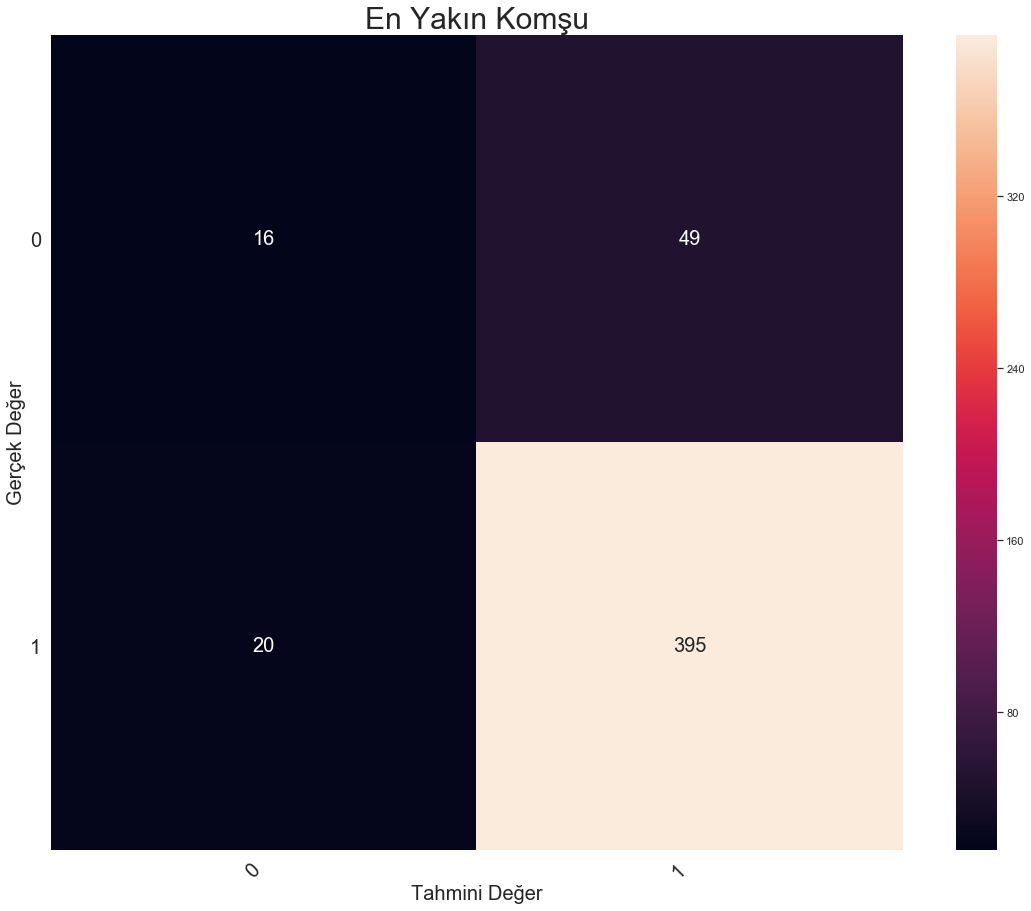

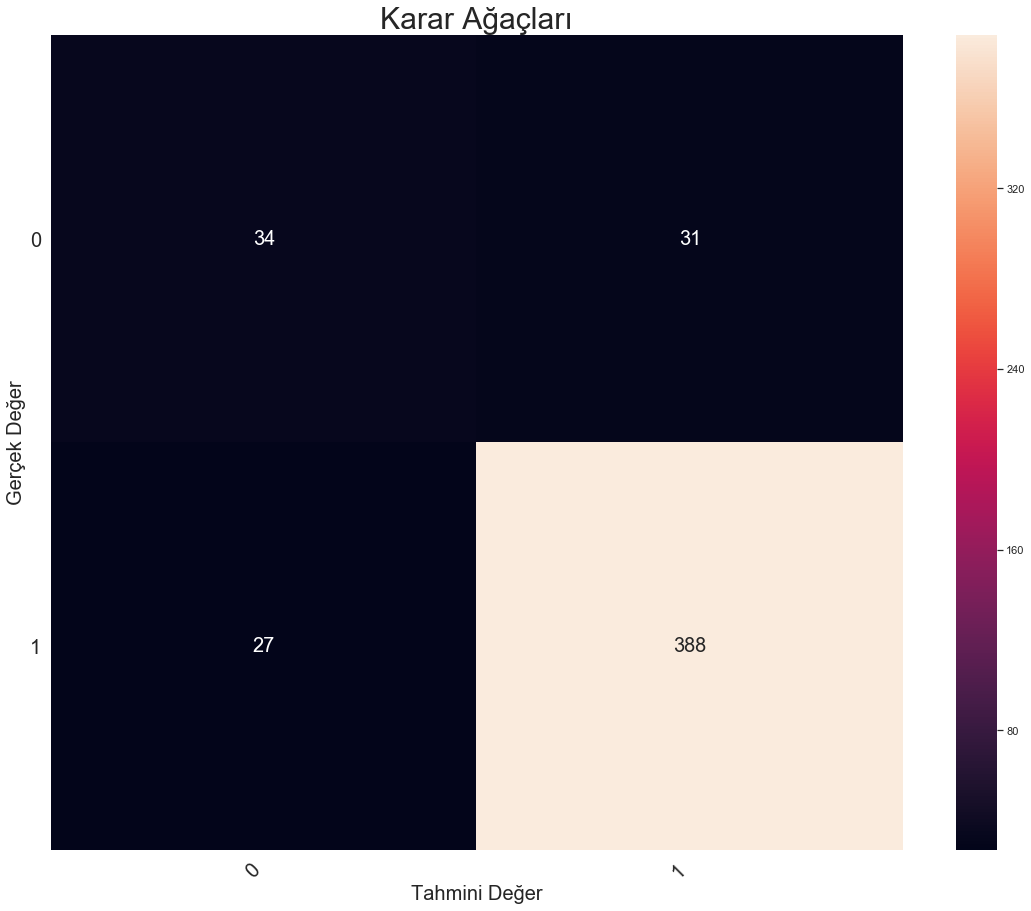

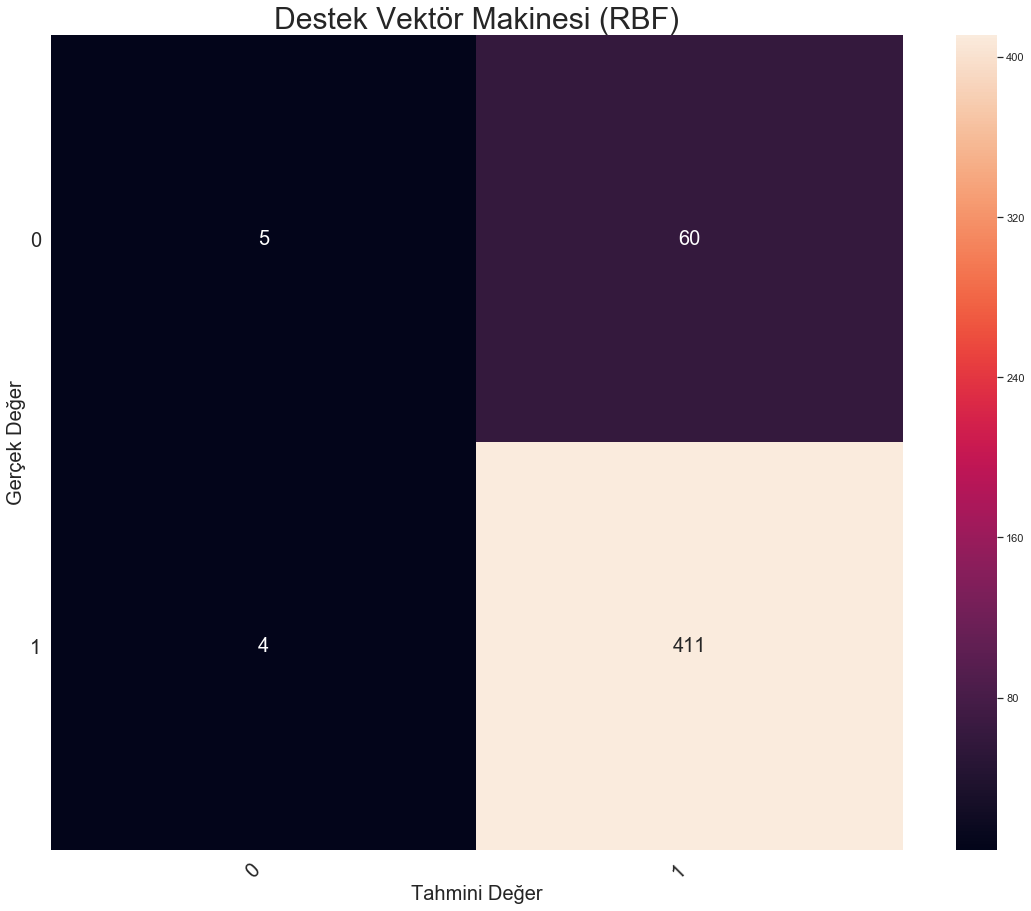

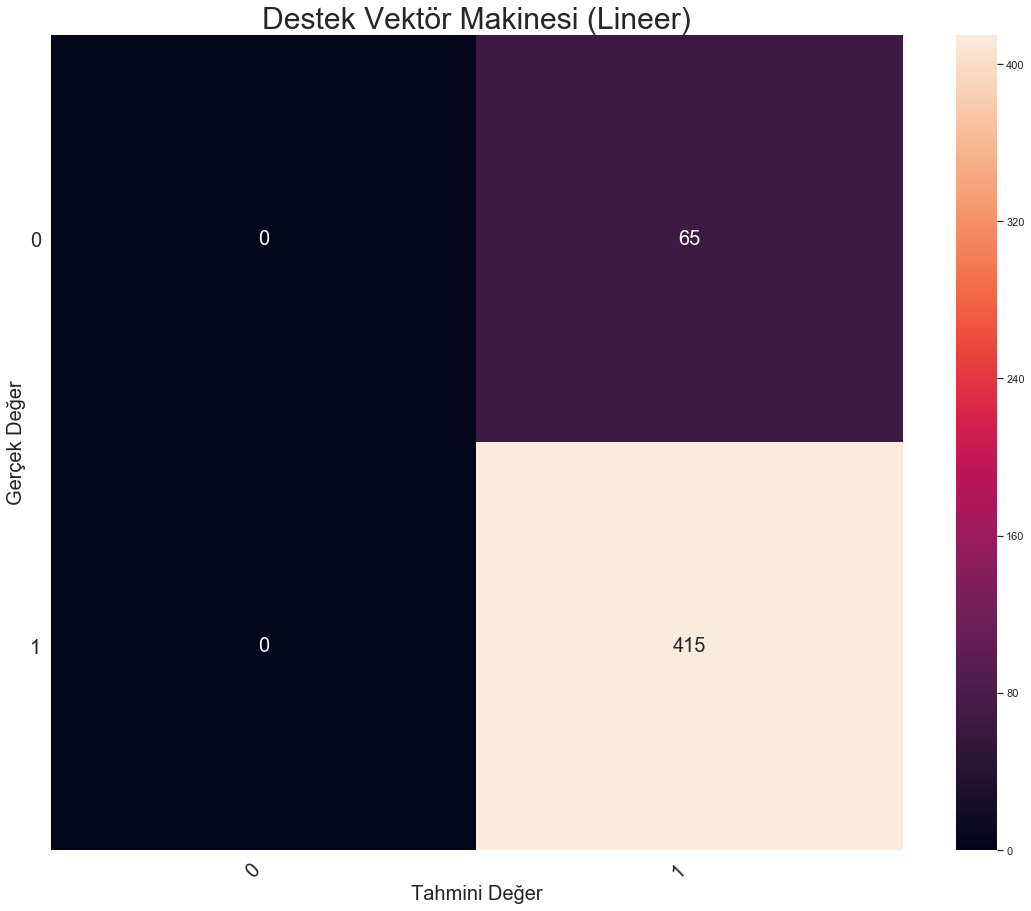

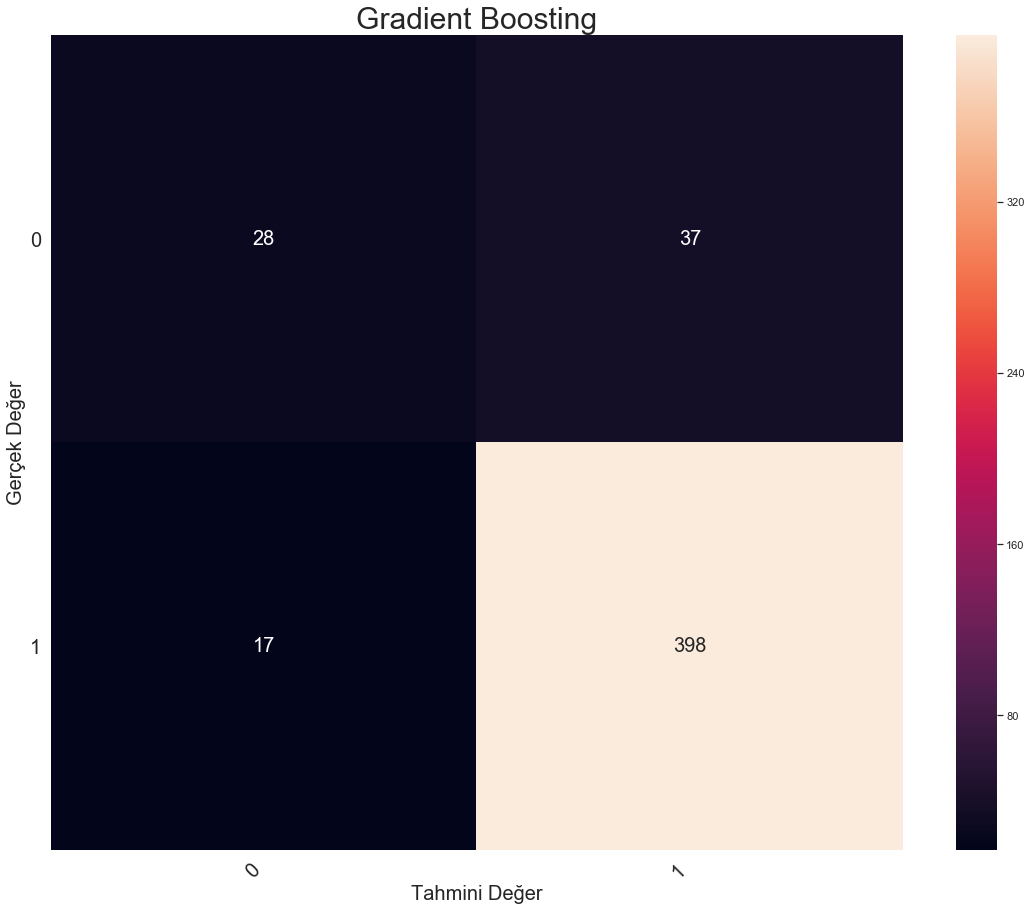

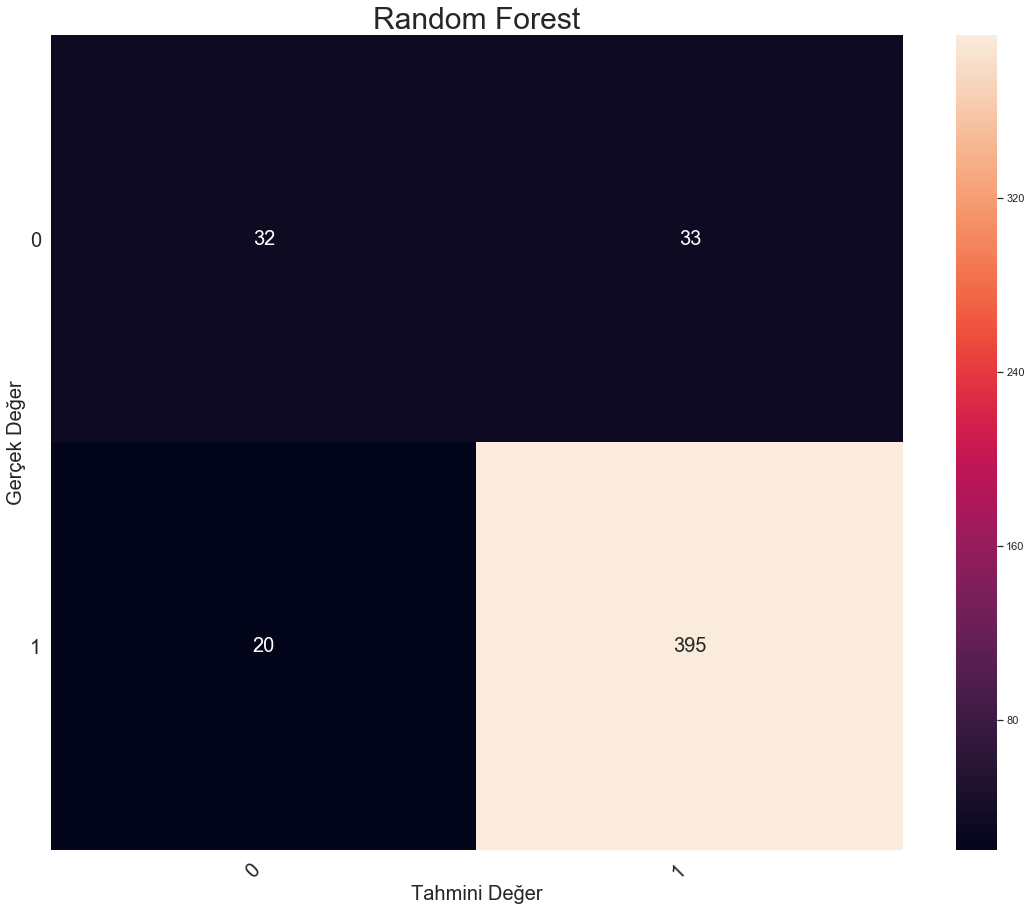

In [46]:
models=[LogisticRegression(),GaussianNB(),KNeighborsClassifier(),DecisionTreeClassifier(),SVC(kernel = 'rbf', random_state = 76),
            SVC(kernel='linear', random_state = 76),GradientBoostingClassifier(),RandomForestClassifier()]
modelNames=["Lojistik Regresyon","Gaussian Naive Bayes","En Yakın Komşu",
               "Karar Ağaçları","Destek Vektör Makinesi (RBF)",
              "Destek Vektör Makinesi (Lineer)","Gradient Boosting","Random Forest"]

newAcc = []
i=0
for model in modelNames:
    clf = models[i]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    newAcc.append(accuracy_score(y_pred,y_test)*100)
    print_confusion_matrix(confusion_matrix(y_test, y_pred),np.unique(y_test),model+"NEW")
    i+=1

In [47]:
d={'Model':modelNames,'Skor':newAcc}
acc_frame=pd.DataFrame(d)
acc_frame.sort_values(by='Skor', ascending=False)

,Model,Skor
7,Random Forest,88.958333
6,Gradient Boosting,88.750000
3,Karar Ağaçları,87.916667
4,Destek Vektör Makinesi (RBF),86.666667
0,Lojistik Regresyon,86.458333
5,Destek Vektör Makinesi (Lineer),86.458333
2,En Yakın Komşu,85.625000
1,Gaussian Naive Bayes,85.208333


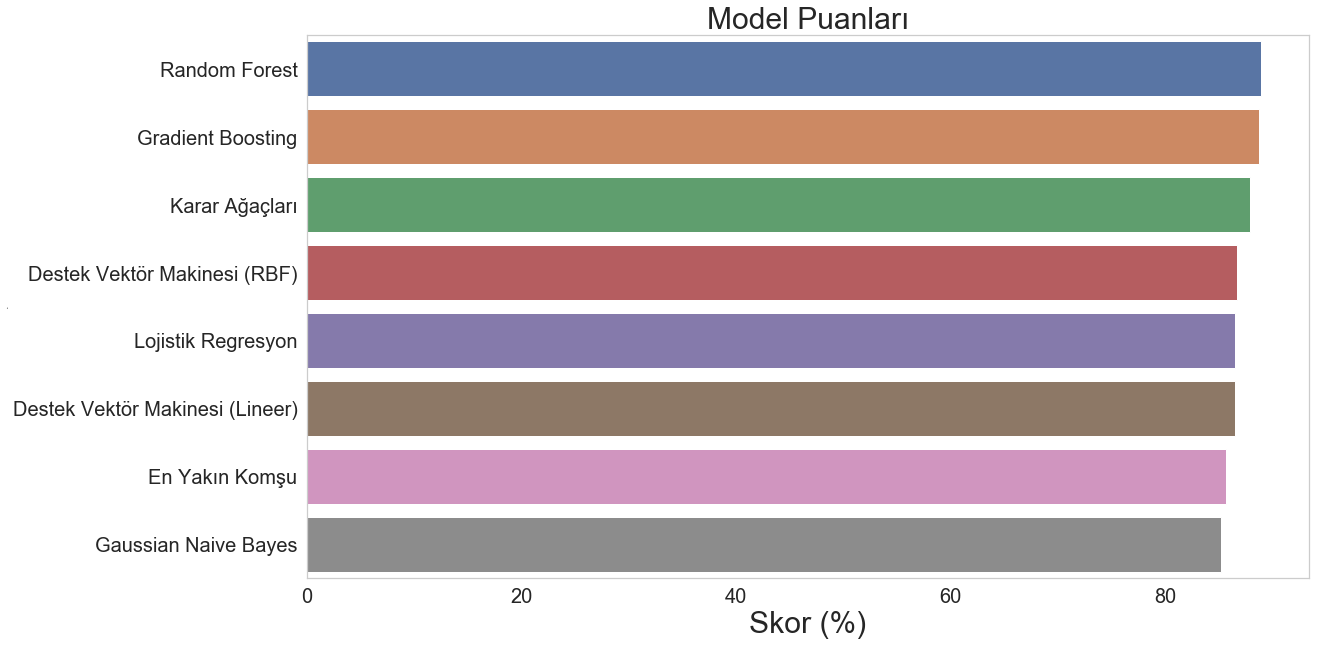

In [48]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(16,10)
sns.barplot(y='Model',x='Skor',data=acc_frame.sort_values(by='Skor', ascending=False))
ax.set_title("Model Puanları",fontsize=30)
ax.set_xlabel('Skor (%)',fontsize=30)
ax.set_ylabel('Miktar',fontsize=0)
ax.tick_params(labelsize=20)
ax.grid(False)
plt.show()

In [49]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
scModelNames=["Lojistik Regresyon ve Standart Scaler",
              "Gaussian Naive Bayes ve Standart Scaler",
              "En Yakın Komşu ve Standart Scaler",
              "Karar Ağaçları ve Standart Scaler",
              "Destek Vektör Makinesi (RBF) ve Standart Scaler",
              "Destek Vektör Makinesi (Lineer) ve Standart Scaler",
              "Gradient Boosting ve Standart Scaler",
              "Random Forest ve Standart Scaler"]

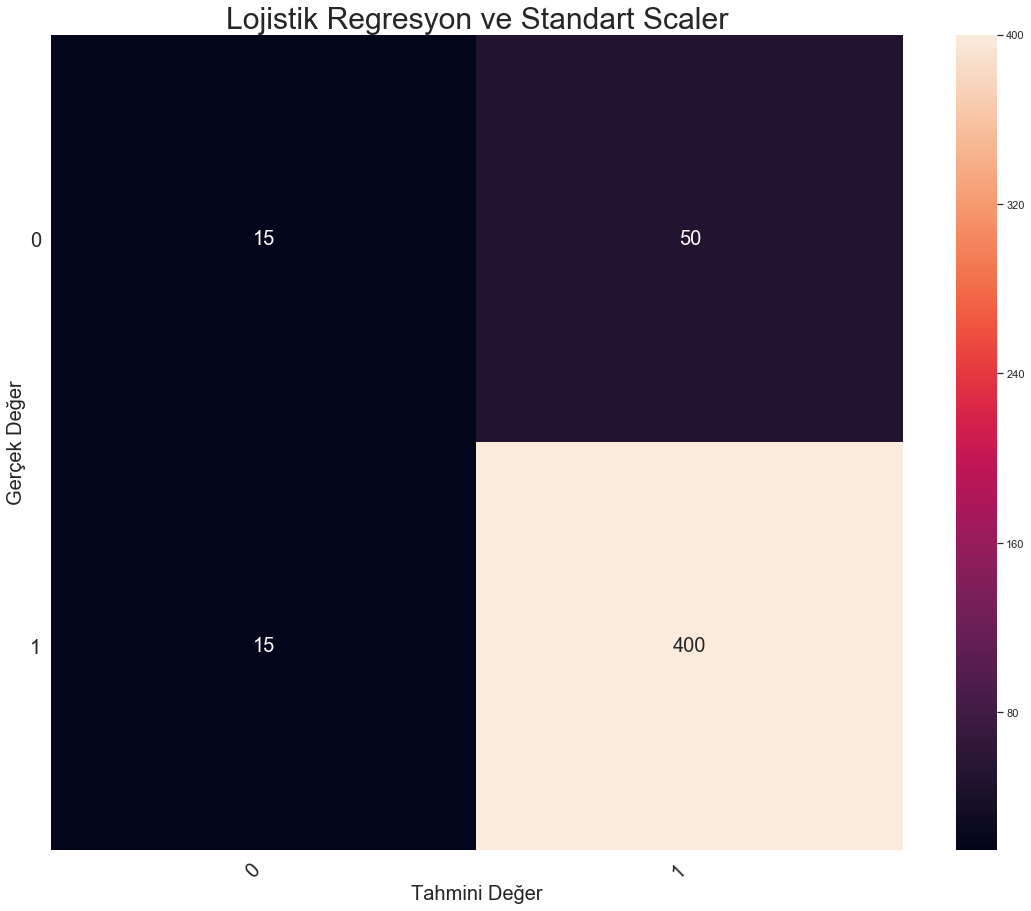

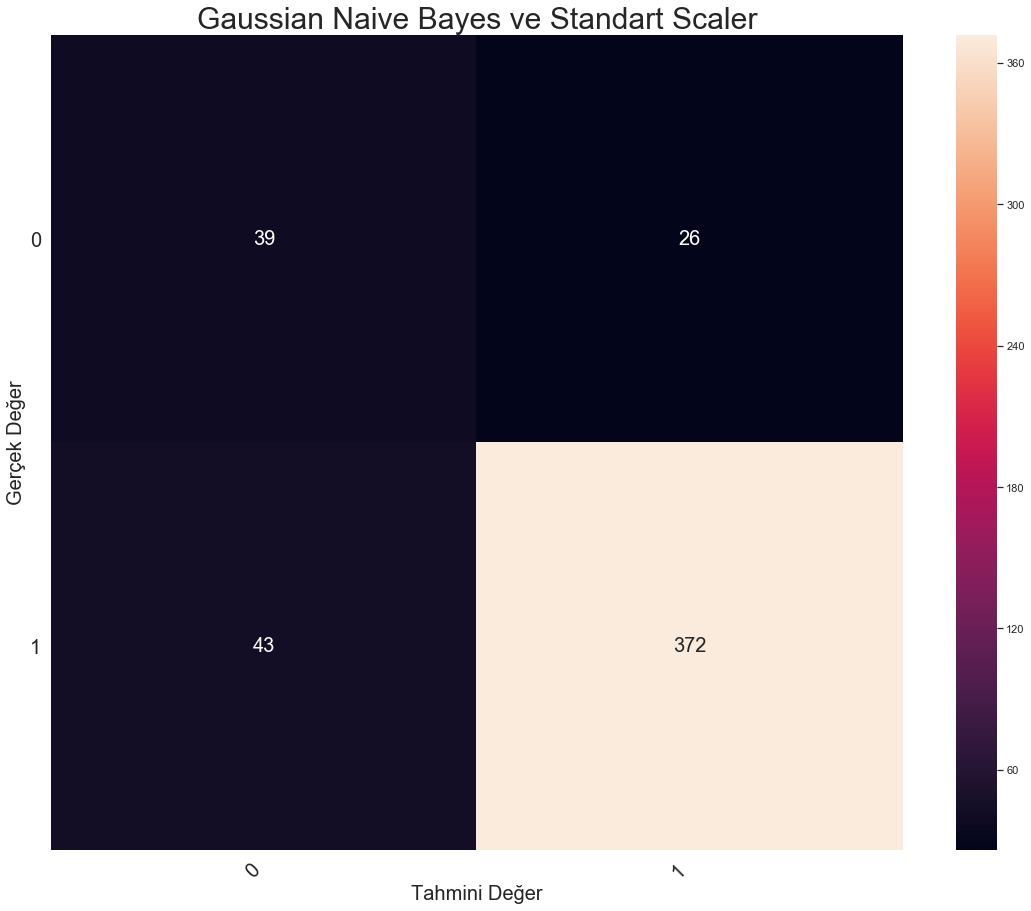

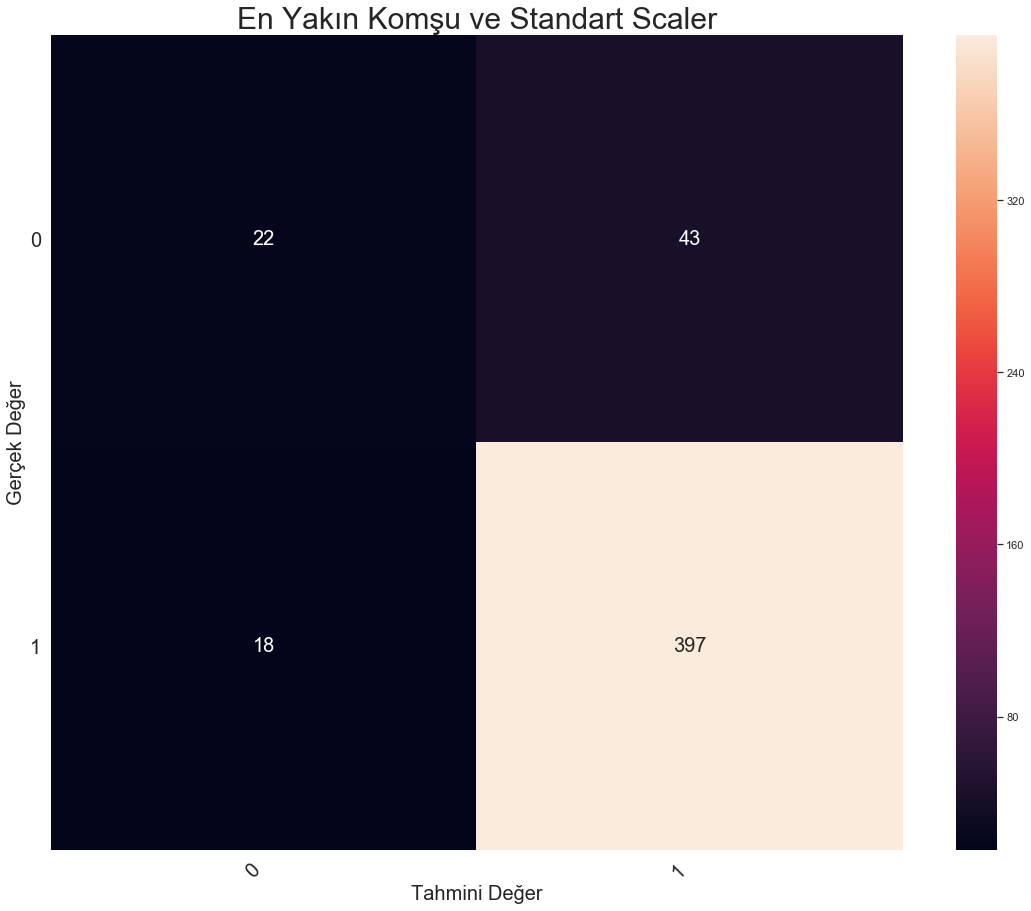

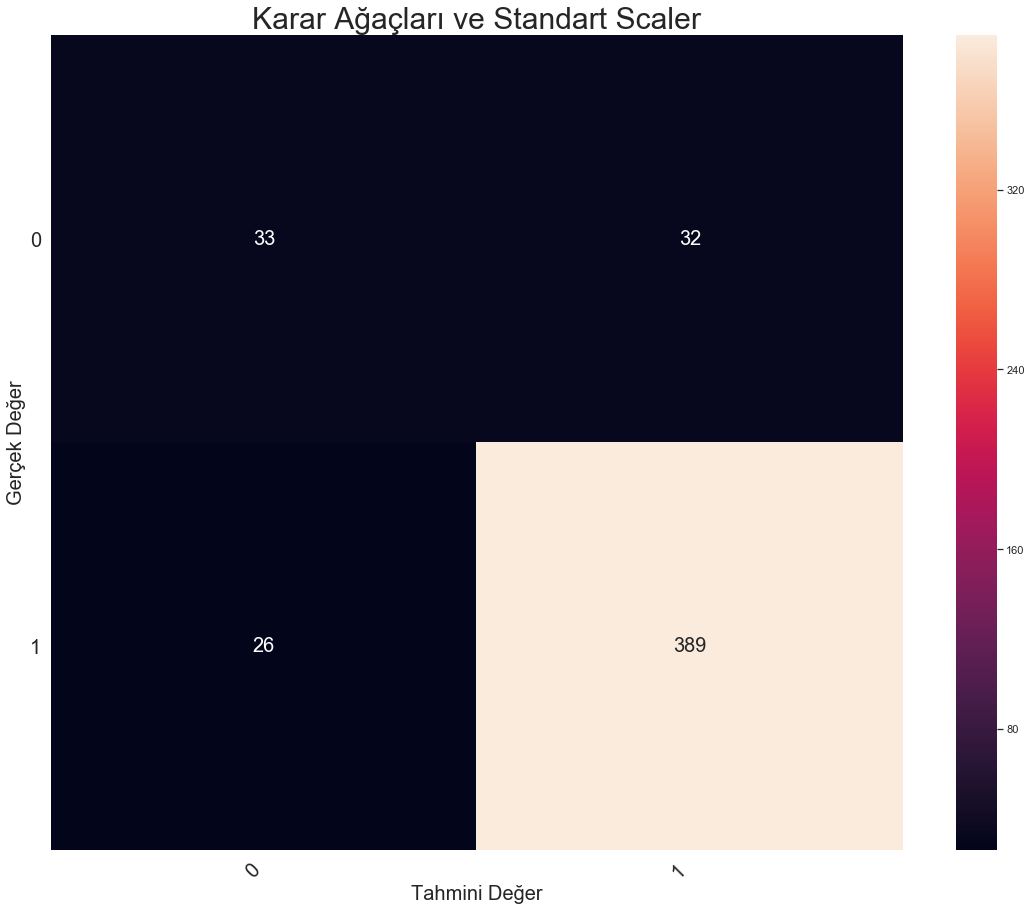

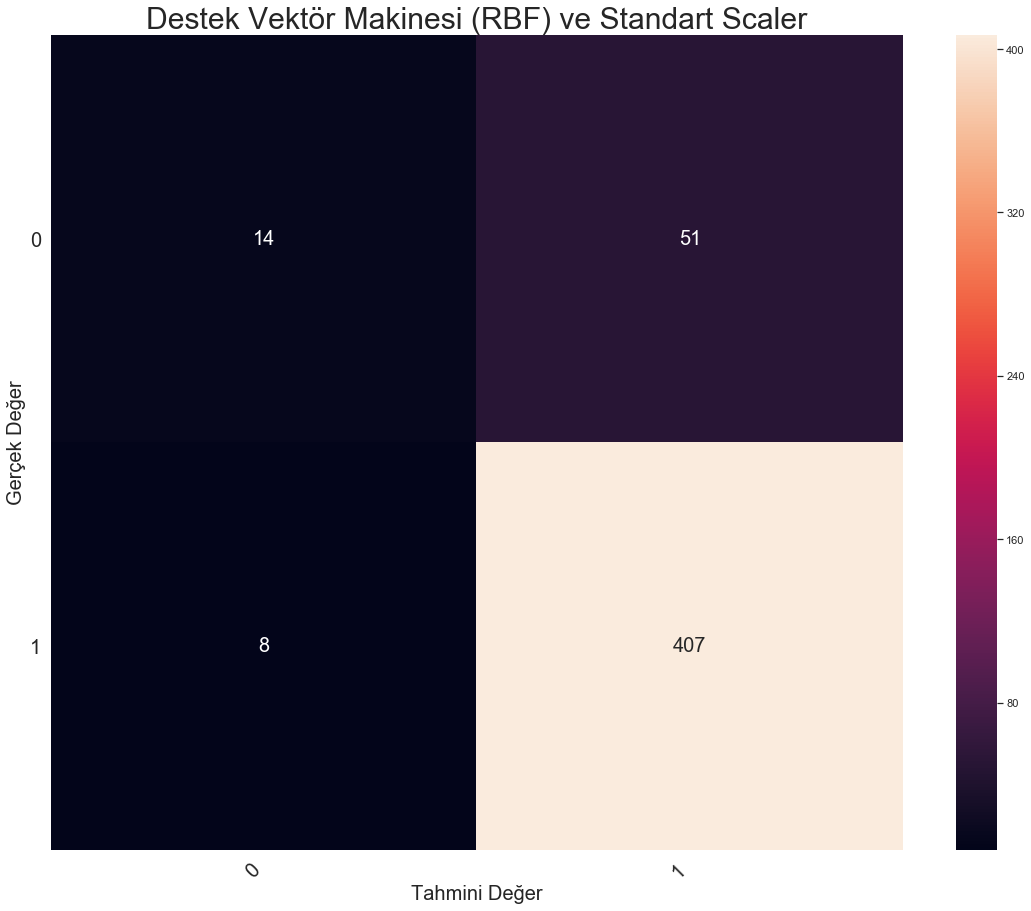

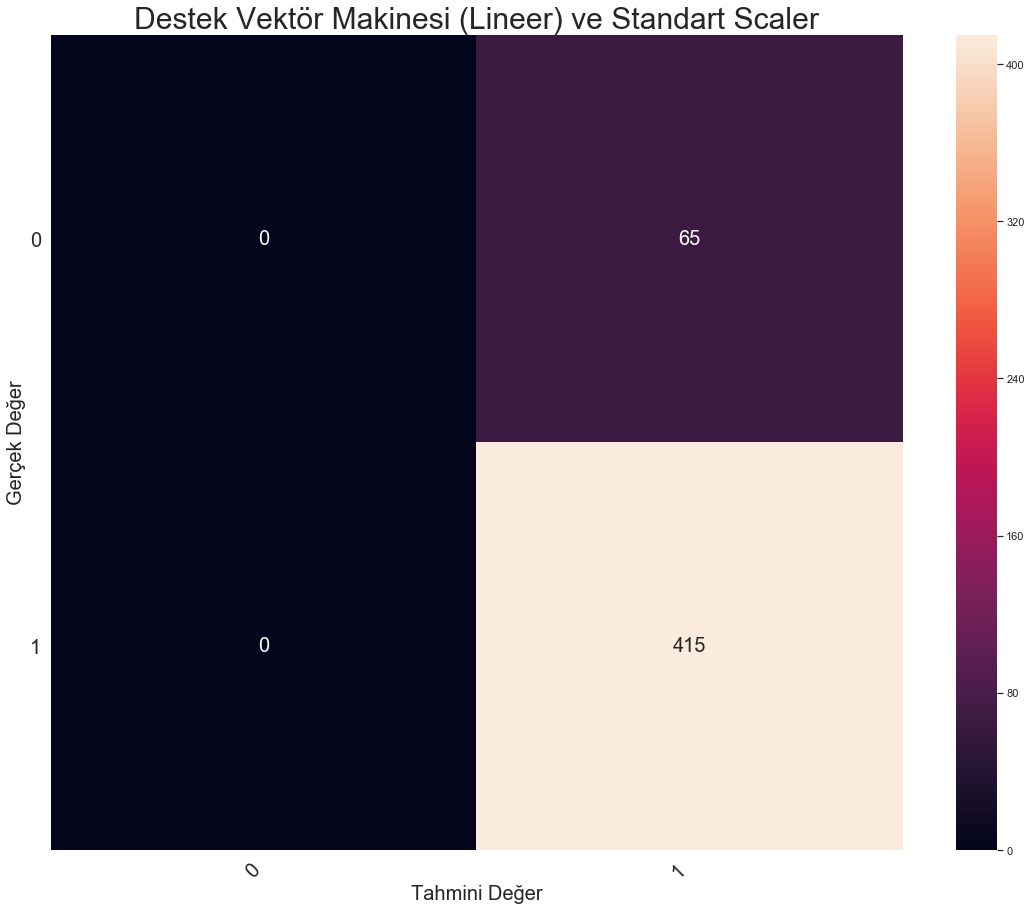

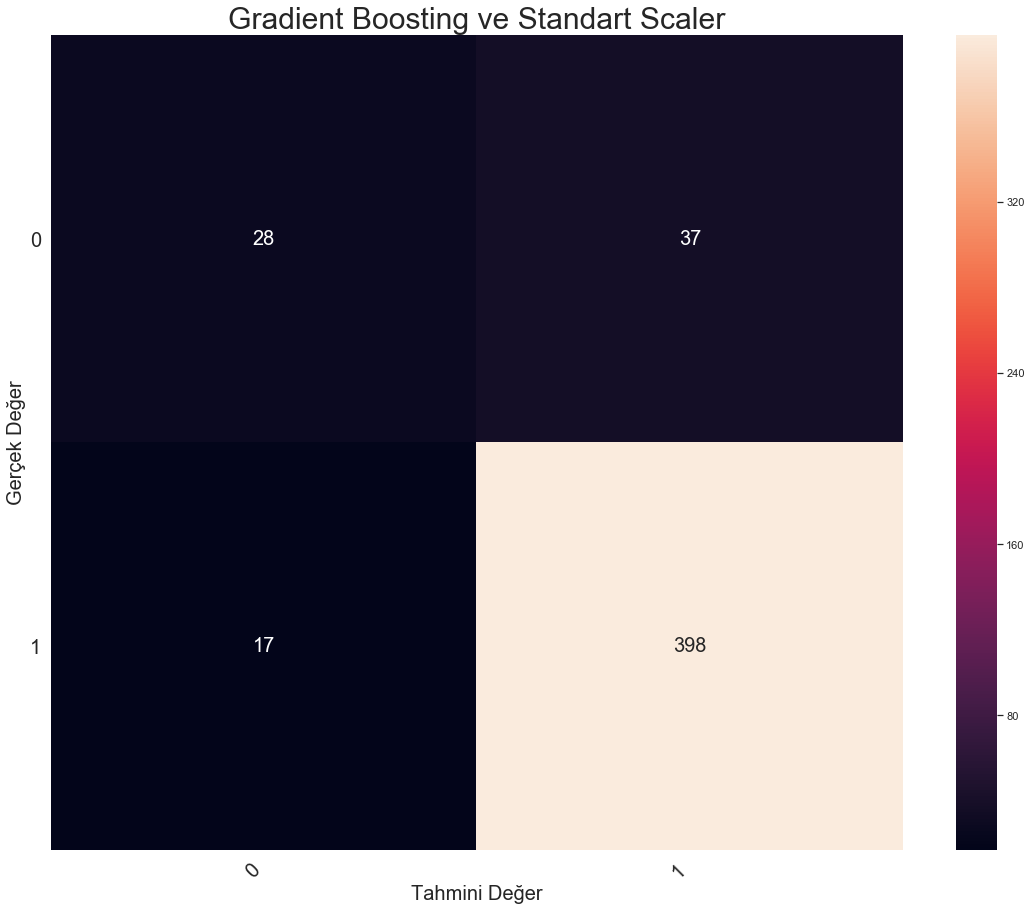

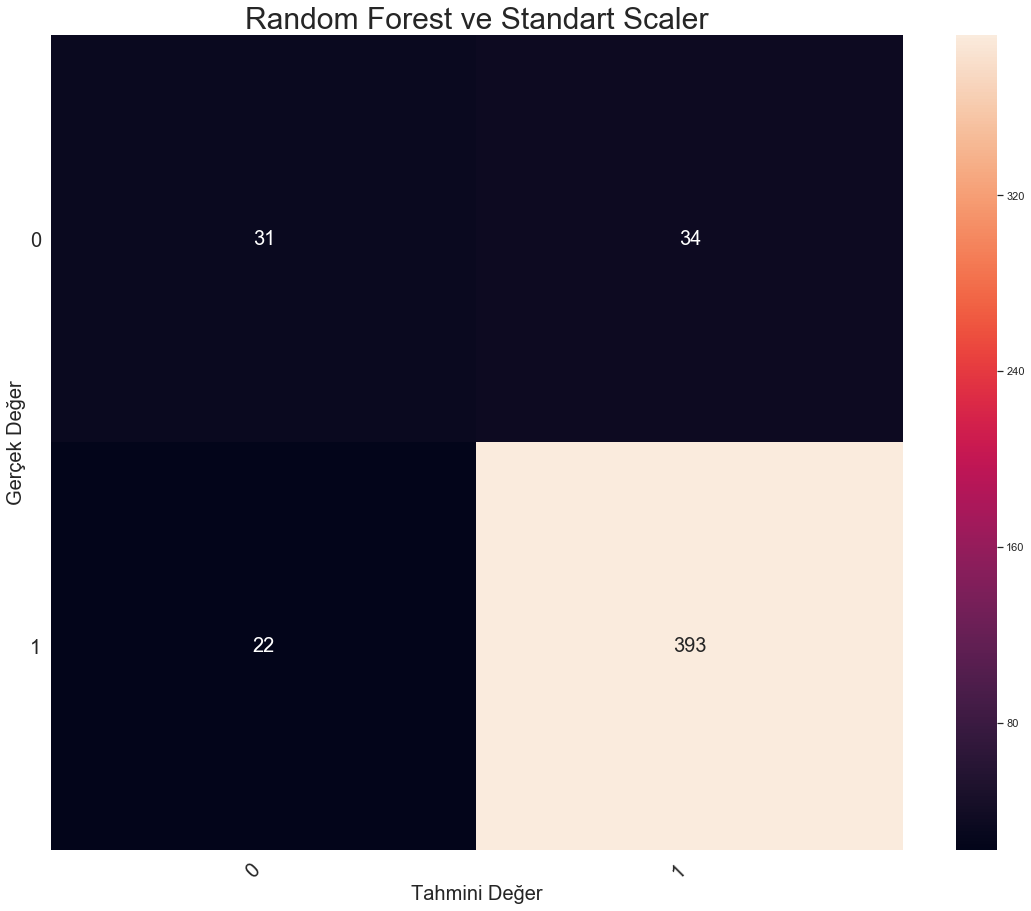

In [51]:
scAcc = []
i=0
for model in scModelNames:
    clf = models[i]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scAcc.append(accuracy_score(y_pred,y_test)*100)
    print_confusion_matrix(confusion_matrix(y_test, y_pred),np.unique(y_test),model+"NEW")
    i+=1

In [105]:
modelNames=["Lojistik Regresyon","Gaussian Naive Bayes","En Yakın Komşu",
               "Karar Ağaçları","Destek Vektör Makinesi (RBF)",
              "Destek Vektör Makinesi (Lineer)","Gradient Boosting","Random Forest"]

d={'Model':modelNames,'Skor':scAcc}
scAcc_frame=pd.DataFrame(d)
scAcc_frame.sort_values(by='Skor', ascending=False)

,Model,Skor
6,Gradient Boosting,88.750000
7,Random Forest,88.333333
3,Karar Ağaçları,87.916667
4,Destek Vektör Makinesi (RBF),87.708333
2,En Yakın Komşu,87.291667
0,Lojistik Regresyon,86.458333
5,Destek Vektör Makinesi (Lineer),86.458333
1,Gaussian Naive Bayes,85.625000


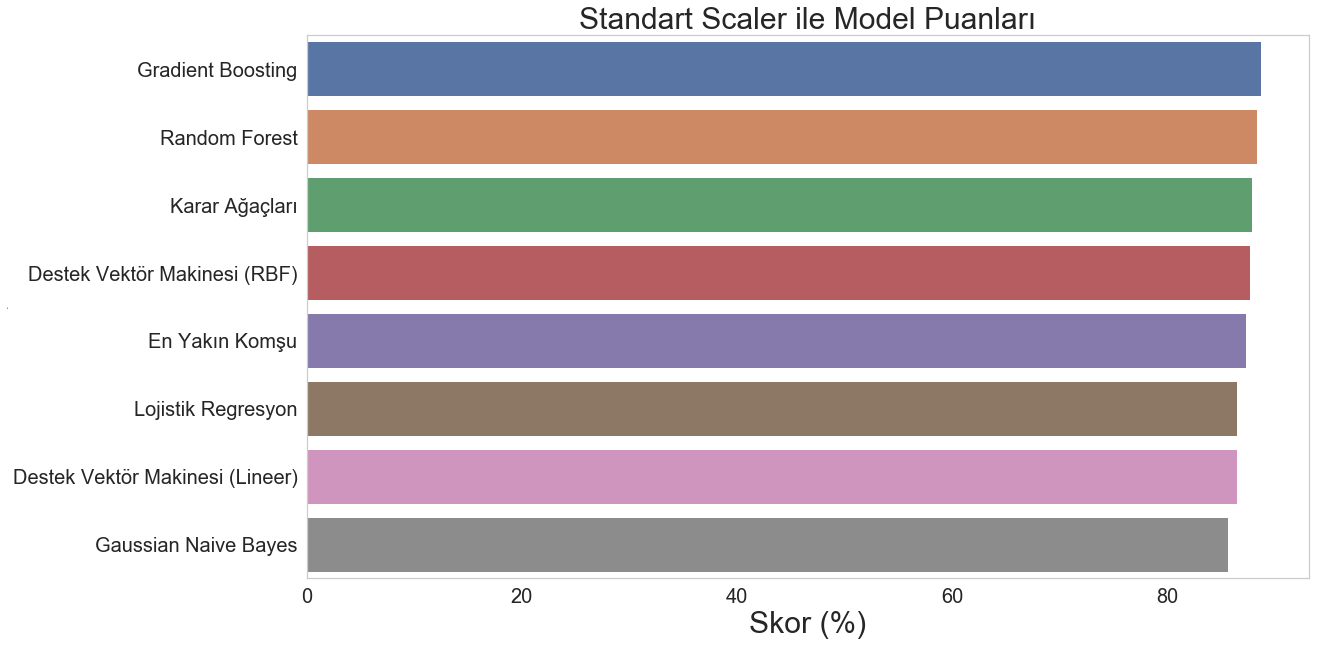

In [106]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(16,10)
sns.barplot(y='Model',x='Skor',data=scAcc_frame.sort_values(by='Skor', ascending=False))
ax.set_title("Standart Scaler ile Model Puanları",fontsize=30)
ax.set_xlabel('Skor (%)',fontsize=30)
ax.set_ylabel('Miktar',fontsize=0)
ax.tick_params(labelsize=20)
ax.grid(False)
plt.show()

In [54]:
totalAcc = acc_frame.copy()
totalAcc["Standart Scaler Skor"] = np.array(scAcc)
totalAcc

,Model,Skor,Standart Scaler Skor
0,Lojistik Regresyon,86.458333,86.458333
1,Gaussian Naive Bayes,85.208333,85.625000
2,En Yakın Komşu,85.625000,87.291667
3,Karar Ağaçları,87.916667,87.916667
4,Destek Vektör Makinesi (RBF),86.666667,87.708333
5,Destek Vektör Makinesi (Lineer),86.458333,86.458333
6,Gradient Boosting,88.750000,88.750000
7,Random Forest,88.958333,88.333333


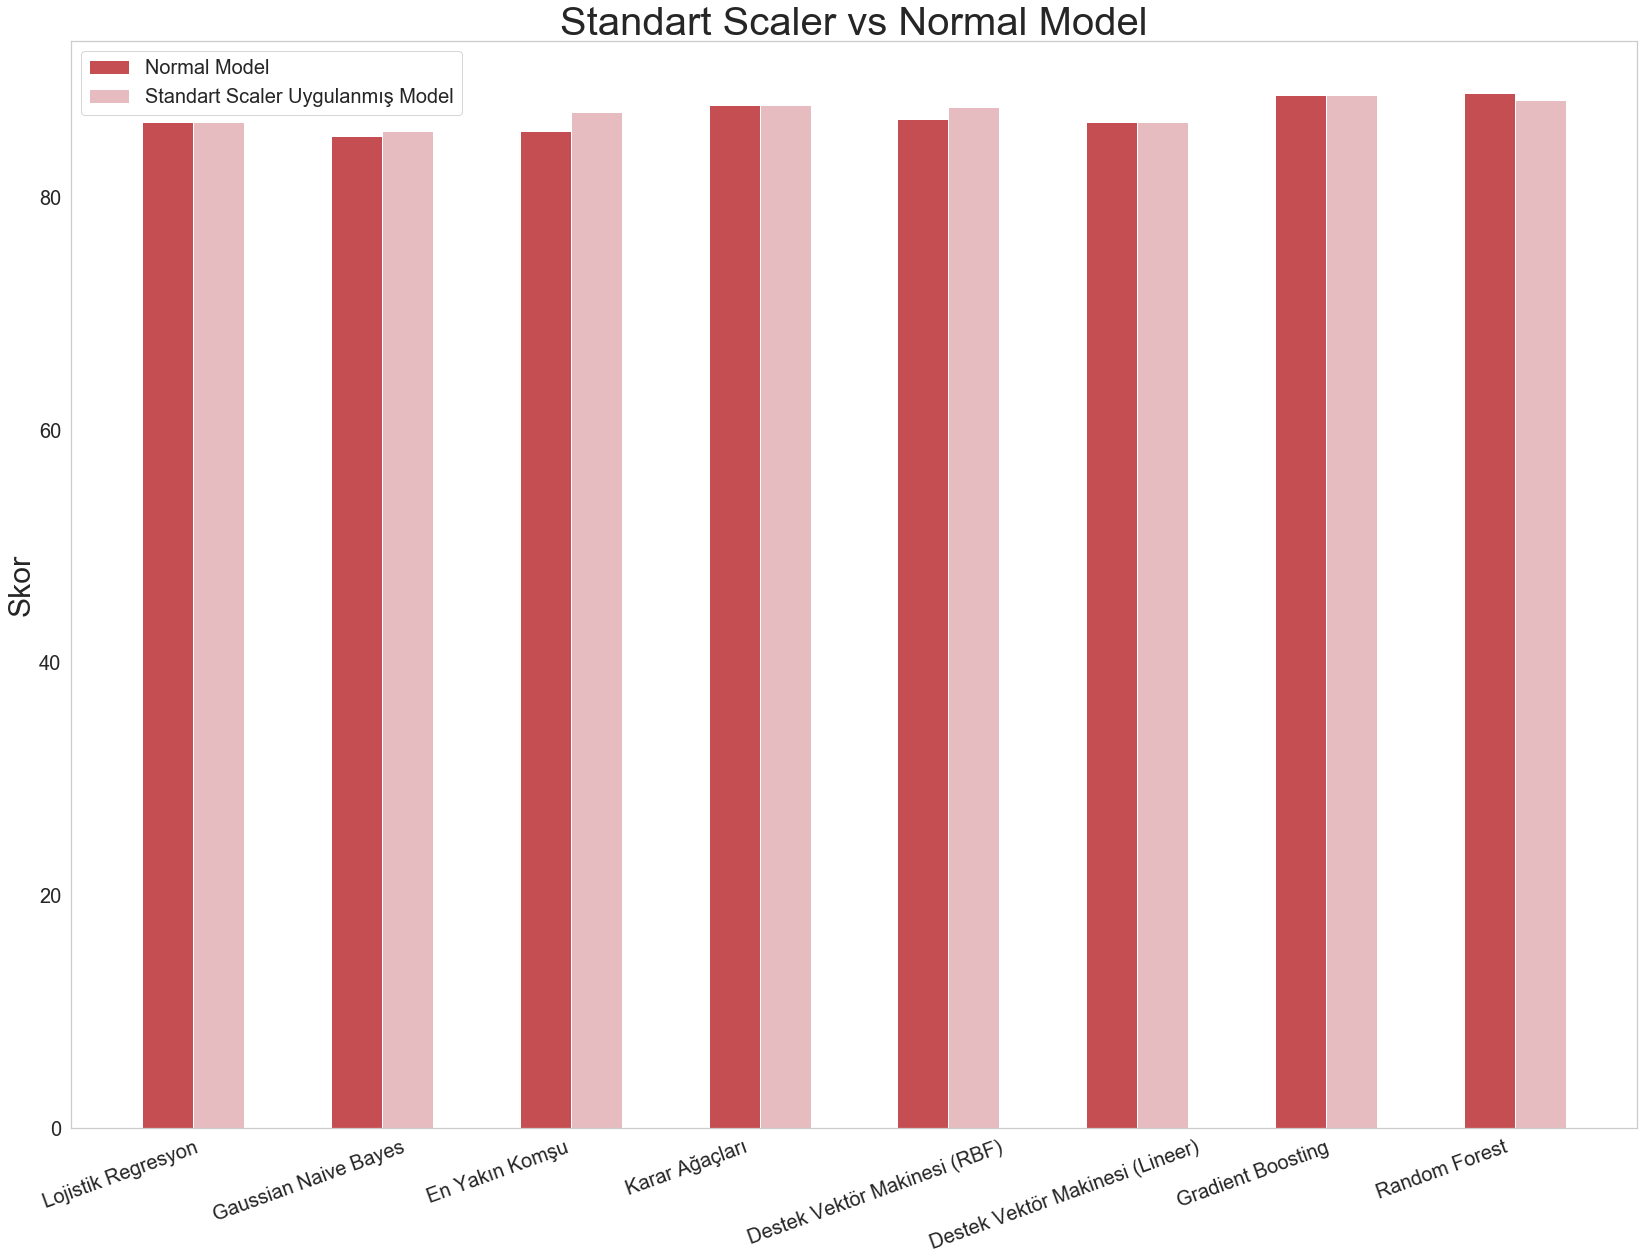

In [55]:
N = 8
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (25,20));

yvals = totalAcc.Skor
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = totalAcc["Standart Scaler Skor"]
rects2 = ax.bar(ind+width, zvals, width, color='#e6bcc0')

ax.set_ylabel('Skor',fontsize=30)
ax.set_title("Standart Scaler vs Normal Model",fontsize=40)
ax.set_xticks(ind-0.25)
ax.tick_params(labelsize=20)
ax.set_xticklabels( ("Lojistik Regresyon","Gaussian Naive Bayes","En Yakın Komşu",
               "Karar Ağaçları","Destek Vektör Makinesi (RBF)",
              "Destek Vektör Makinesi (Lineer)","Gradient Boosting","Random Forest") ,fontsize=20,rotation = 20)
ax.legend( (rects1[0], rects2[0]), ('Normal Model', 'Standart Scaler Uygulanmış Model') ,fontsize=20)

ax.grid(False)

plt.show()

In [56]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

In [57]:
# Lojistik Regresyon
params_dict={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
clf_lr=GridSearchCV(estimator=LogisticRegression(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_lr.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [58]:
clf_lr.best_score_

0.8856121537086684

In [59]:
pred=clf_lr.predict(X_test)
accuracy_score(pred,y_test)

0.8708333333333333

In [60]:
# KNN
l=[i+1 for i in range(50)]
params_dict={'n_neighbors':l,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_knn.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [61]:
clf_knn.best_score_

0.8865058087578195

In [62]:
pred=clf_knn.predict(X_test)
accuracy_score(pred,y_test)

0.8729166666666667

In [63]:
# SVM
params_dict={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100],'kernel':['linear','rbf']}
clf=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [64]:
clf.best_score_

0.8945487042001787

In [65]:
pred=clf.predict(X_test)
accuracy_score(pred,y_test)

0.89375

In [66]:
params_dict={'C':[0.90,0.92,0.96,0.98,1.0,1.2,1.5],'gamma':[0.90,0.92,0.96,0.98,1.0,1.2,1.5],'kernel':['linear','rbf']}
clf_svm=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_svm.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.9, 0.92, 0.96, 0.98, 1.0, 1.2, 1.5], 'gamma': [0.9, 0.92, 0.96, 0.98, 1.0, 1.2, 1.5], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [67]:
clf_svm.best_score_

0.8900804289544236

In [68]:
pred=clf_svm.predict(X_test)
accuracy_score(pred,y_test)

0.9041666666666667

In [69]:
# Random Forest
params_dict={'n_estimators':[500],'max_features':['auto','sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),param_grid=params_dict,scoring='accuracy',cv=10)
clf_rf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [500], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [70]:
clf_rf.best_score_

0.900804289544236

In [71]:
pred=clf_rf.predict(X_test)
accuracy_score(pred,y_test)

0.9020833333333333

In [72]:
# Gradient Boosting
clf_gb=GridSearchCV(estimator=GradientBoostingClassifier(),cv=10,param_grid=dict({'n_estimators':[500]}))
clf_gb.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [500]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [73]:
clf_gb.best_score_

0.8945487042001787

In [74]:
pred=clf_gb.predict(X_test)
accuracy_score(pred,y_test)

0.8895833333333333

In [75]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [76]:
newData = data.copy()
bins = (2,6.5,8)
group_names = ['kötü','iyi']

categories = pd.cut(newData['quality'], bins, labels = group_names)
newData['quality'] = categories

newData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,kötü
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,kötü
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,kötü
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,kötü
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,kötü


In [77]:
X = newData.drop(['quality'], axis = 1)
y = newData['quality']

In [78]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 76)

In [80]:
print("TRAIN",Counter(y_train))
print("TEST",Counter(y_test))

TRAIN Counter({1: 967, 0: 152})
TEST Counter({1: 415, 0: 65})


In [81]:
models=[LogisticRegression(),GaussianNB(),KNeighborsClassifier(),DecisionTreeClassifier(),SVC(kernel = 'rbf', random_state = 76),
            SVC(kernel='linear', random_state = 76),GradientBoostingClassifier(),RandomForestClassifier()]
modelNames=["Lojistik Regresyon","Gaussian Naive Bayes","En Yakın Komşu",
               "Karar Ağaçları","Destek Vektör Makinesi (RBF)",
              "Destek Vektör Makinesi (Lineer)","Gradient Boosting","Random Forest"]

In [82]:
acc = []
i=0
for model in modelNames:
    clf = models[i]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc.append(accuracy_score(y_pred,y_test)*100)
    i+=1

In [83]:
len(acc)

8

In [84]:
d={'Model':modelNames,'Skor':acc}
acc_frame=pd.DataFrame(d)
acc_frame.sort_values(by='Skor', ascending=False)

,Model,Skor
7,Random Forest,90.833333
6,Gradient Boosting,88.750000
4,Destek Vektör Makinesi (RBF),87.500000
0,Lojistik Regresyon,86.875000
2,En Yakın Komşu,86.875000
5,Destek Vektör Makinesi (Lineer),86.458333
3,Karar Ağaçları,85.625000
1,Gaussian Naive Bayes,84.583333


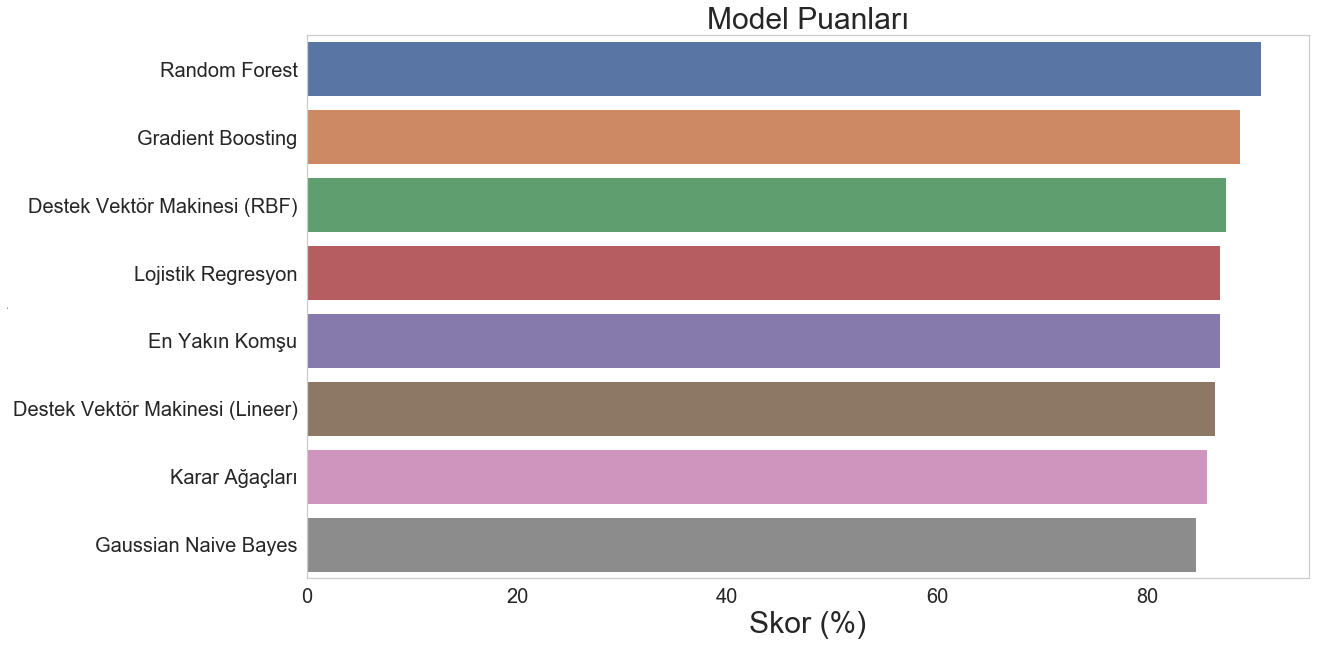

In [85]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(16,10)
sns.barplot(y='Model',x='Skor',data=acc_frame.sort_values(by='Skor', ascending=False))
ax.set_title("Model Puanları",fontsize=30)
ax.set_xlabel('Skor (%)',fontsize=30)
ax.set_ylabel('Miktar',fontsize=0)
ax.tick_params(labelsize=20)
ax.grid(False)
plt.show()

In [86]:
# Lojistik Regresyon
params_dict={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
clf_lr=GridSearchCV(estimator=LogisticRegression(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_lr.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [87]:
clf_lr.best_score_

0.8918677390527256

In [88]:
pred=clf_lr.predict(X_test)
accuracy_score(pred,y_test)

0.86875

In [89]:
# KNN
l=[i+1 for i in range(50)]
params_dict={'n_neighbors':l,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_knn.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [90]:
clf_knn.best_score_

0.8668453976764968

In [91]:
pred=clf_knn.predict(X_test)
accuracy_score(pred,y_test)

0.8666666666666667

In [92]:
# SVM
params_dict={'C':[10,100],'gamma':[10,100],'kernel':["rbf"]}
clf=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [10, 100], 'gamma': [10, 100], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [93]:
clf.best_score_

0.8909740840035746

In [94]:
pred=clf.predict(X_test)
accuracy_score(pred,y_test)

0.8916666666666667

In [95]:
params_dict={'C':[0.98,1.0,1.2,1.5],'gamma':[0.98,1.0,1.2,1.5],'kernel':["rbf"]}
clf_svm=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_svm.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.98, 1.0, 1.2, 1.5], 'gamma': [0.98, 1.0, 1.2, 1.5], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [96]:
clf_svm.best_score_

0.8954423592493298

In [97]:
pred=clf_svm.predict(X_test)
accuracy_score(pred,y_test)

0.8916666666666667

In [98]:
# Random Forest
params_dict={'n_estimators':[500],'max_features':['auto','sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),param_grid=params_dict,scoring='accuracy',cv=10)
clf_rf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [500], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [99]:
clf_rf.best_score_

0.9061662198391421

In [100]:
pred=clf_rf.predict(X_test)
accuracy_score(pred,y_test)

0.9083333333333333

In [101]:
# Gradient Boosting
clf_gb=GridSearchCV(estimator=GradientBoostingClassifier(),cv=10,param_grid=dict({'n_estimators':[500]}))
clf_gb.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [500]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [102]:
clf_gb.best_score_

0.8990169794459338

In [103]:
pred=clf_gb.predict(X_test)
accuracy_score(pred,y_test)

0.90625